In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(font_scale=1.2)
col = '#3B1C8C'
cm = 'viridis'

In [2]:
df = pd.read_csv('./Tema_13.csv')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,...,NaN,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,NaN,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,NaN,239.554,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,NaN,239.554,...,NaN,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               713 non-null    float64
 1   Reason for absence               712 non-null    float64
 2   Month of absence                 712 non-null    float64
 3   Day of the week                  713 non-null    float64
 4   Seasons                          710 non-null    float64
 5   Transportation expense           712 non-null    float64
 6   Distance from Residence to Work  715 non-null    float64
 7   Service time                     712 non-null    float64
 8   Age                              713 non-null    object 
 9   Work load Average/day            713 non-null    float64
 10  Hit target                       713 non-null    float64
 11  Disciplinary failure             712 non-null    float64
 12  Education             

In [4]:
def perColInfo (df):
    for col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False).head(10))
        
def perColPlot(df, max_categories=10, figsize=(5, 3), cm='viridis'):
    num_cols = len(df.columns)
    ncols = 3
    nrows = -(-num_cols // ncols)  # ceil division

    cmap = plt.get_cmap(cm)

    plt.figure(figsize=(figsize[0] * ncols, figsize[1] * nrows))

    for i, col in enumerate(df.columns, 1):
        plt.subplot(nrows, ncols, i)
        plt.title(col, fontsize=10)

        # Valores y colores según el colormap
        value_counts = df[col].value_counts(dropna=False).head(max_categories)

        if df[col].dtype.kind in "biufc":
            n = 15
            colors = cmap(np.linspace(0, 1, n))
            plt.hist(df[col].dropna(), bins=n, color=colors[5], edgecolor='black')
            plt.ylabel("Frecuencia")
        else:
            n = len(value_counts)
            colors = cmap(np.linspace(0, 1, n))
            bars = plt.bar(value_counts.index.astype(str), value_counts.values, color=colors, edgecolor='black')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel("Conteo")

        plt.tight_layout()

    plt.show()
    
perColInfo(df)


--- ID ---
ID
3.0     109
28.0     71
34.0     54
22.0     46
20.0     40
NaN      37
15.0     37
11.0     36
36.0     32
24.0     31
Name: count, dtype: int64

--- Reason for absence ---
Reason for absence
23.0    144
28.0    106
27.0     67
13.0     51
0.0      42
NaN      38
19.0     38
22.0     37
26.0     33
25.0     30
Name: count, dtype: int64

--- Month of absence ---
Month of absence
3.0     85
10.0    69
2.0     67
7.0     65
5.0     64
11.0    59
6.0     54
8.0     51
1.0     50
4.0     50
Name: count, dtype: int64

--- Day of the week ---
Day of the week
2.0    154
4.0    152
3.0    143
6.0    143
5.0    121
NaN     37
Name: count, dtype: int64

--- Seasons ---
Seasons
4.0    186
2.0    183
3.0    179
1.0    162
NaN     40
Name: count, dtype: int64

--- Transportation expense ---
Transportation expense
179.0    171
118.0     84
225.0     81
235.0     55
289.0     44
260.0     40
NaN       38
291.0     34
246.0     30
155.0     29
Name: count, dtype: int64

--- Distance fro

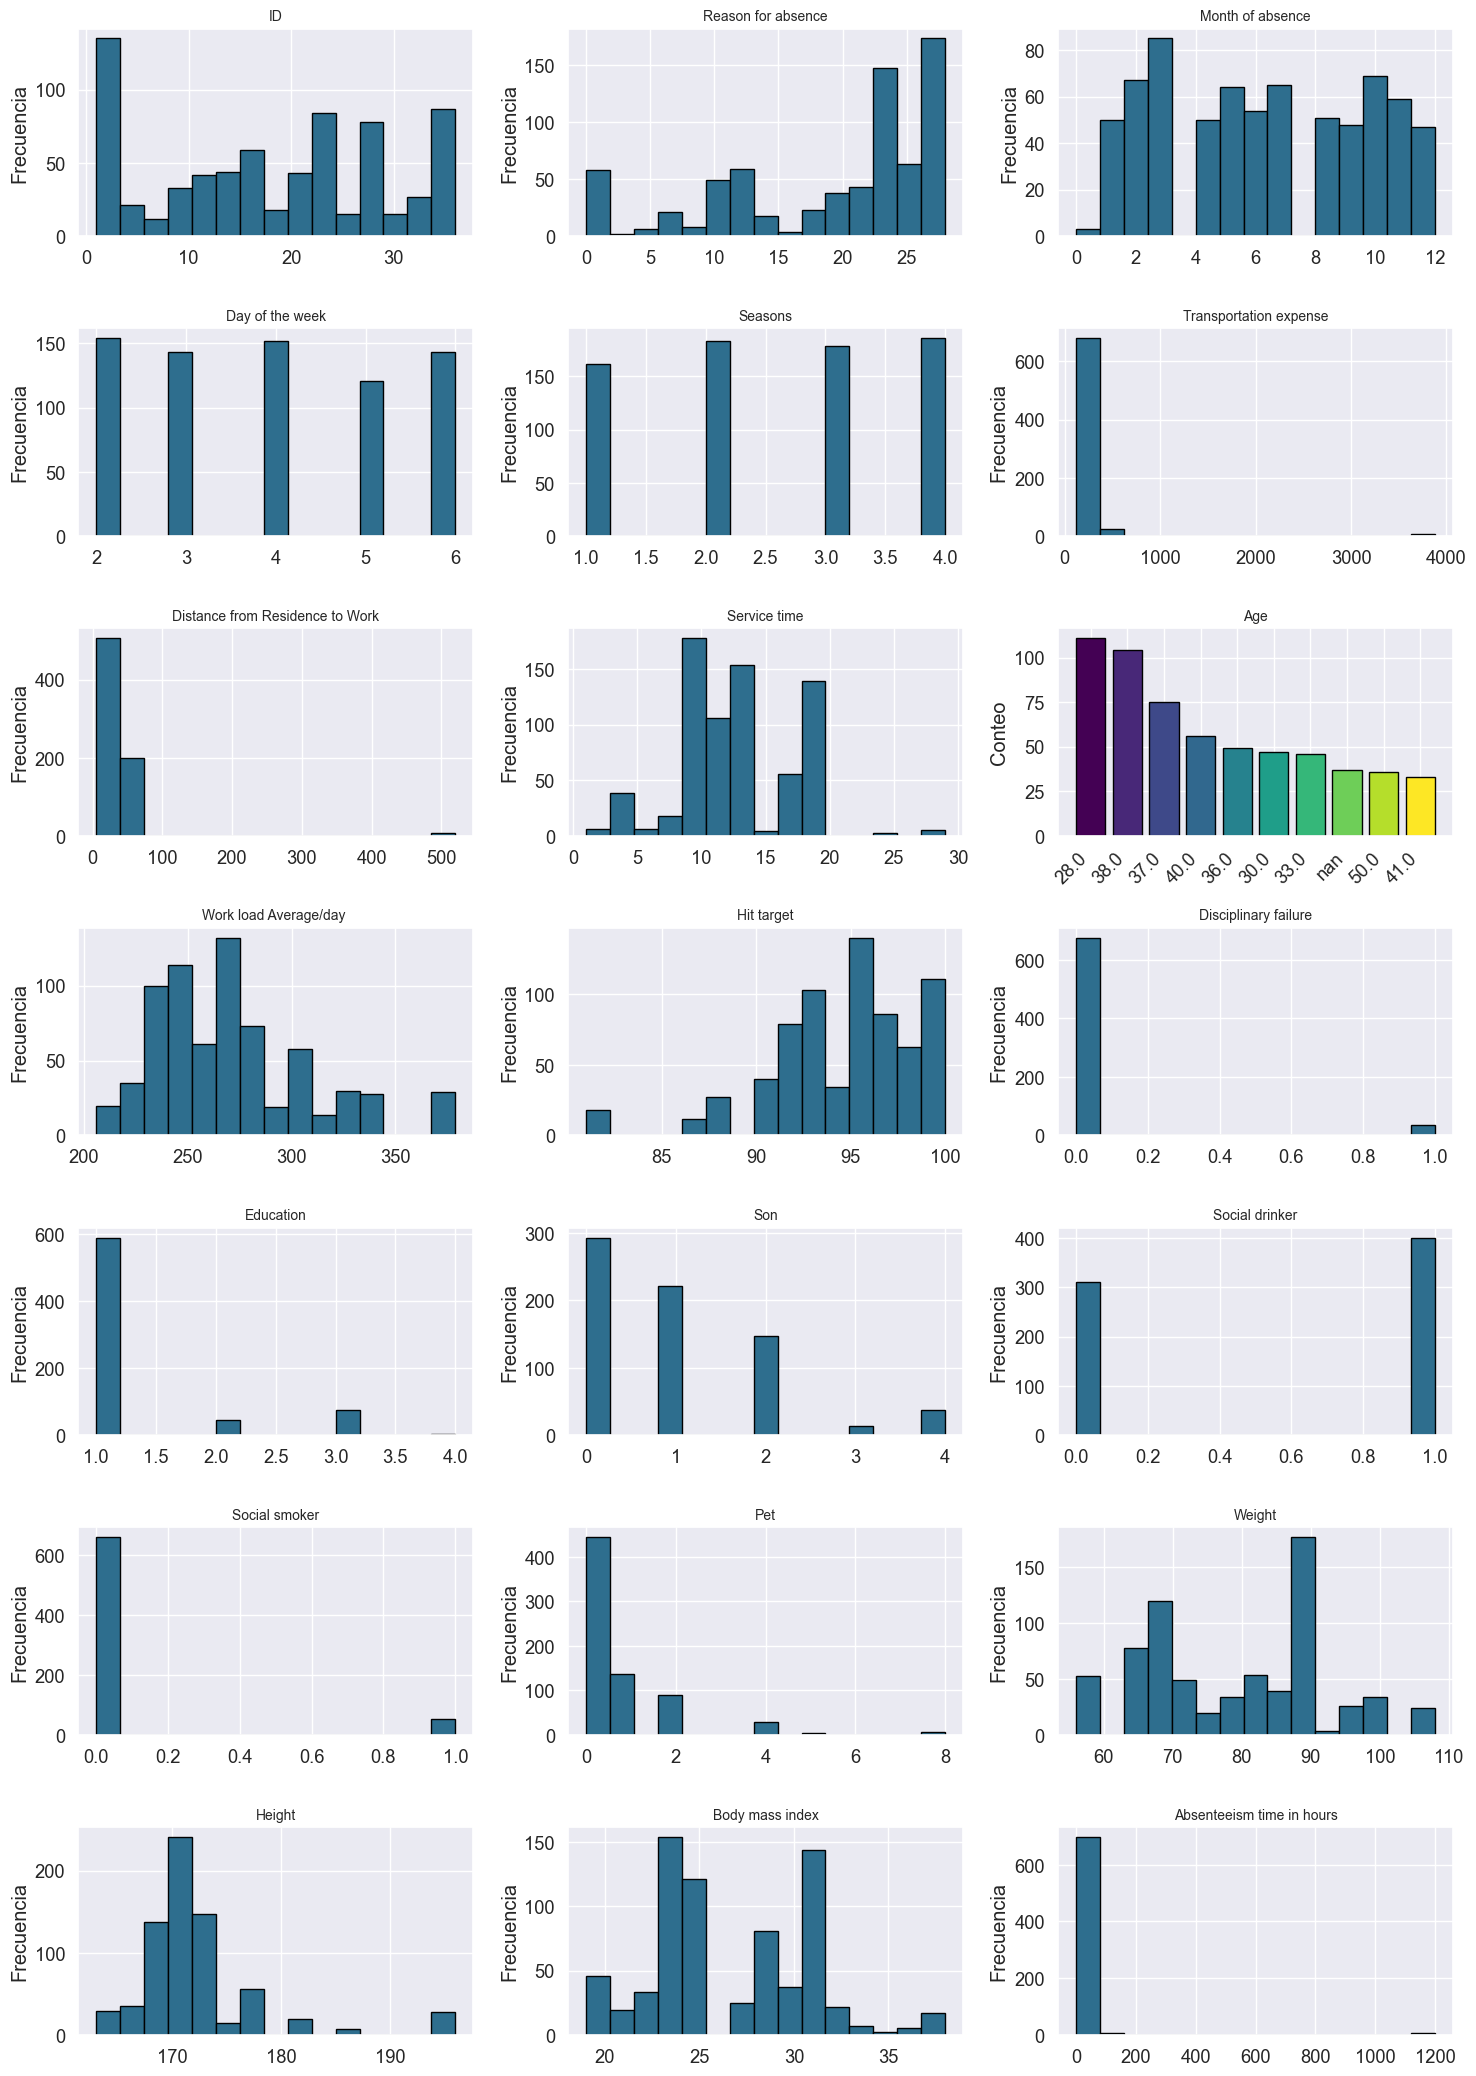

In [5]:
perColPlot(df)

# Pretratamiento

In [6]:
df.rename(columns={'Reason for absence': 'Reason',
                  'Month of absence': 'Month',
                  'Day of the week': 'Weekday',
                   'Seasons': 'Season',
                   'Disciplinary failure': 'Failure',
                  'Transportation expense': 'Expense',
                  'Distance from Residence to Work': 'Distance',
                  'Service time': 'ServiceTime',
                  'Work load Average/day ': 'Workload',
                   'Hit target': 'HitTarget',
                   'Son': 'Child',
                  'Social drinker': 'Drinker',
                  'Social smoker': 'Smoker',
                  'Body mass index': 'BMI',
                  'Absenteeism time in hours': 'AbsH'}, 
          inplace = True)
df.head(10)

,ID,Reason,Month,Weekday,Season,Expense,Distance,ServiceTime,Age,Workload,...,Failure,Education,Child,Drinker,Smoker,Pet,Weight,Height,BMI,AbsH
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,...,NaN,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,NaN,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,NaN,239.554,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,NaN,239.554,...,NaN,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3.0,23.0,7.0,6.0,NaN,179.0,51.0,18.0,38.0,239.554,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
6,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239.554,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20.0,23.0,7.0,6.0,1.0,260.0,50.0,11.0,36.0,239.554,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14.0,19.0,7.0,2.0,1.0,155.0,12.0,14.0,34.0,239.554,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239.554,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,NaN,29.0,8.0


In [7]:
print("Largo antes de remover los nulls " + str(len(df)))
df.dropna(subset=["AbsH"], inplace=True)
print("Largo luego de remover los nulls " + str(len(df)))

Largo antes de remover los nulls 750
Largo luego de remover los nulls 713


In [8]:

df['Reason']      = df['Reason'].fillna(0)                             
df['Month']       = df['Month'].fillna(df['Month'].mode()[0])          
df['Failure']     = df['Failure'].fillna(0)                            
df['Education']   = df['Education'].fillna(df['Education'].mode()[0])  
df['Pet']         = df['Pet'].fillna(0)                                
df['Child']         = df['Child'].fillna(0)                                
df['Drinker'] = df['Drinker'].fillna(0)                  
df['Smoker']  = df['Smoker'].fillna(0)                   


df['Expense']     = df['Expense'].fillna(df['Expense'].median())       
df['Workload']    = df['Workload'].fillna(df['Workload'].mean())       
df['Distance']    = df['Distance'].fillna(df['Distance'].median())
df['ServiceTime'] = df['ServiceTime'].fillna(df['ServiceTime'].median())
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df['Age']         = df['Age'].fillna(df['Age'].median())
df['Weight']      = df['Weight'].fillna(df['Weight'].median())
df['Height']      = df['Height'].fillna(df['Height'].median())
df['BMI']         = df['BMI'].fillna(df['BMI'].median())
df['HitTarget']  = df['HitTarget'].fillna(df['HitTarget'].mean())

In [9]:
df.drop_duplicates()

,ID,Reason,Month,Weekday,Season,Expense,Distance,ServiceTime,Age,Workload,...,Failure,Education,Child,Drinker,Smoker,Pet,Weight,Height,BMI,AbsH
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,...,0.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,37.0,239.554,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,37.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11.0,14.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,264.604,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,NaN,11.0,7.0,3.0,1.0,235.0,11.0,14.0,37.0,264.604,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,25.0,4.0
737,4.0,0.0,0.0,3.0,1.0,118.0,14.0,13.0,40.0,271.219,...,0.0,1.0,1.0,1.0,0.0,0.0,98.0,170.0,34.0,0.0
738,8.0,0.0,0.0,4.0,2.0,231.0,35.0,14.0,39.0,271.219,...,0.0,1.0,2.0,1.0,0.0,0.0,100.0,170.0,35.0,0.0


In [10]:
perColInfo(df)


--- ID ---
ID
3.0     107
28.0     64
34.0     53
22.0     42
20.0     39
NaN      36
15.0     35
11.0     34
36.0     31
14.0     30
Name: count, dtype: int64

--- Reason ---
Reason
23.0    140
28.0     99
0.0      78
27.0     62
13.0     50
22.0     37
19.0     34
26.0     32
25.0     28
11.0     27
Name: count, dtype: int64

--- Month ---
Month
3.0     119
10.0     68
2.0      65
7.0      62
5.0      59
11.0     57
6.0      52
8.0      47
9.0      47
1.0      46
Name: count, dtype: int64

--- Weekday ---
Weekday
4.0    148
2.0    147
3.0    135
6.0    133
5.0    114
NaN     36
Name: count, dtype: int64

--- Season ---
Season
4.0    178
2.0    175
3.0    169
1.0    154
NaN     37
Name: count, dtype: int64

--- Expense ---
Expense
179.0    164
225.0    111
118.0     83
235.0     53
289.0     41
260.0     39
291.0     32
155.0     29
246.0     28
361.0     22
Name: count, dtype: int64

--- Distance ---
Distance
26.0    142
51.0    115
10.0     52
25.0     46
50.0     38
36.0     36
31

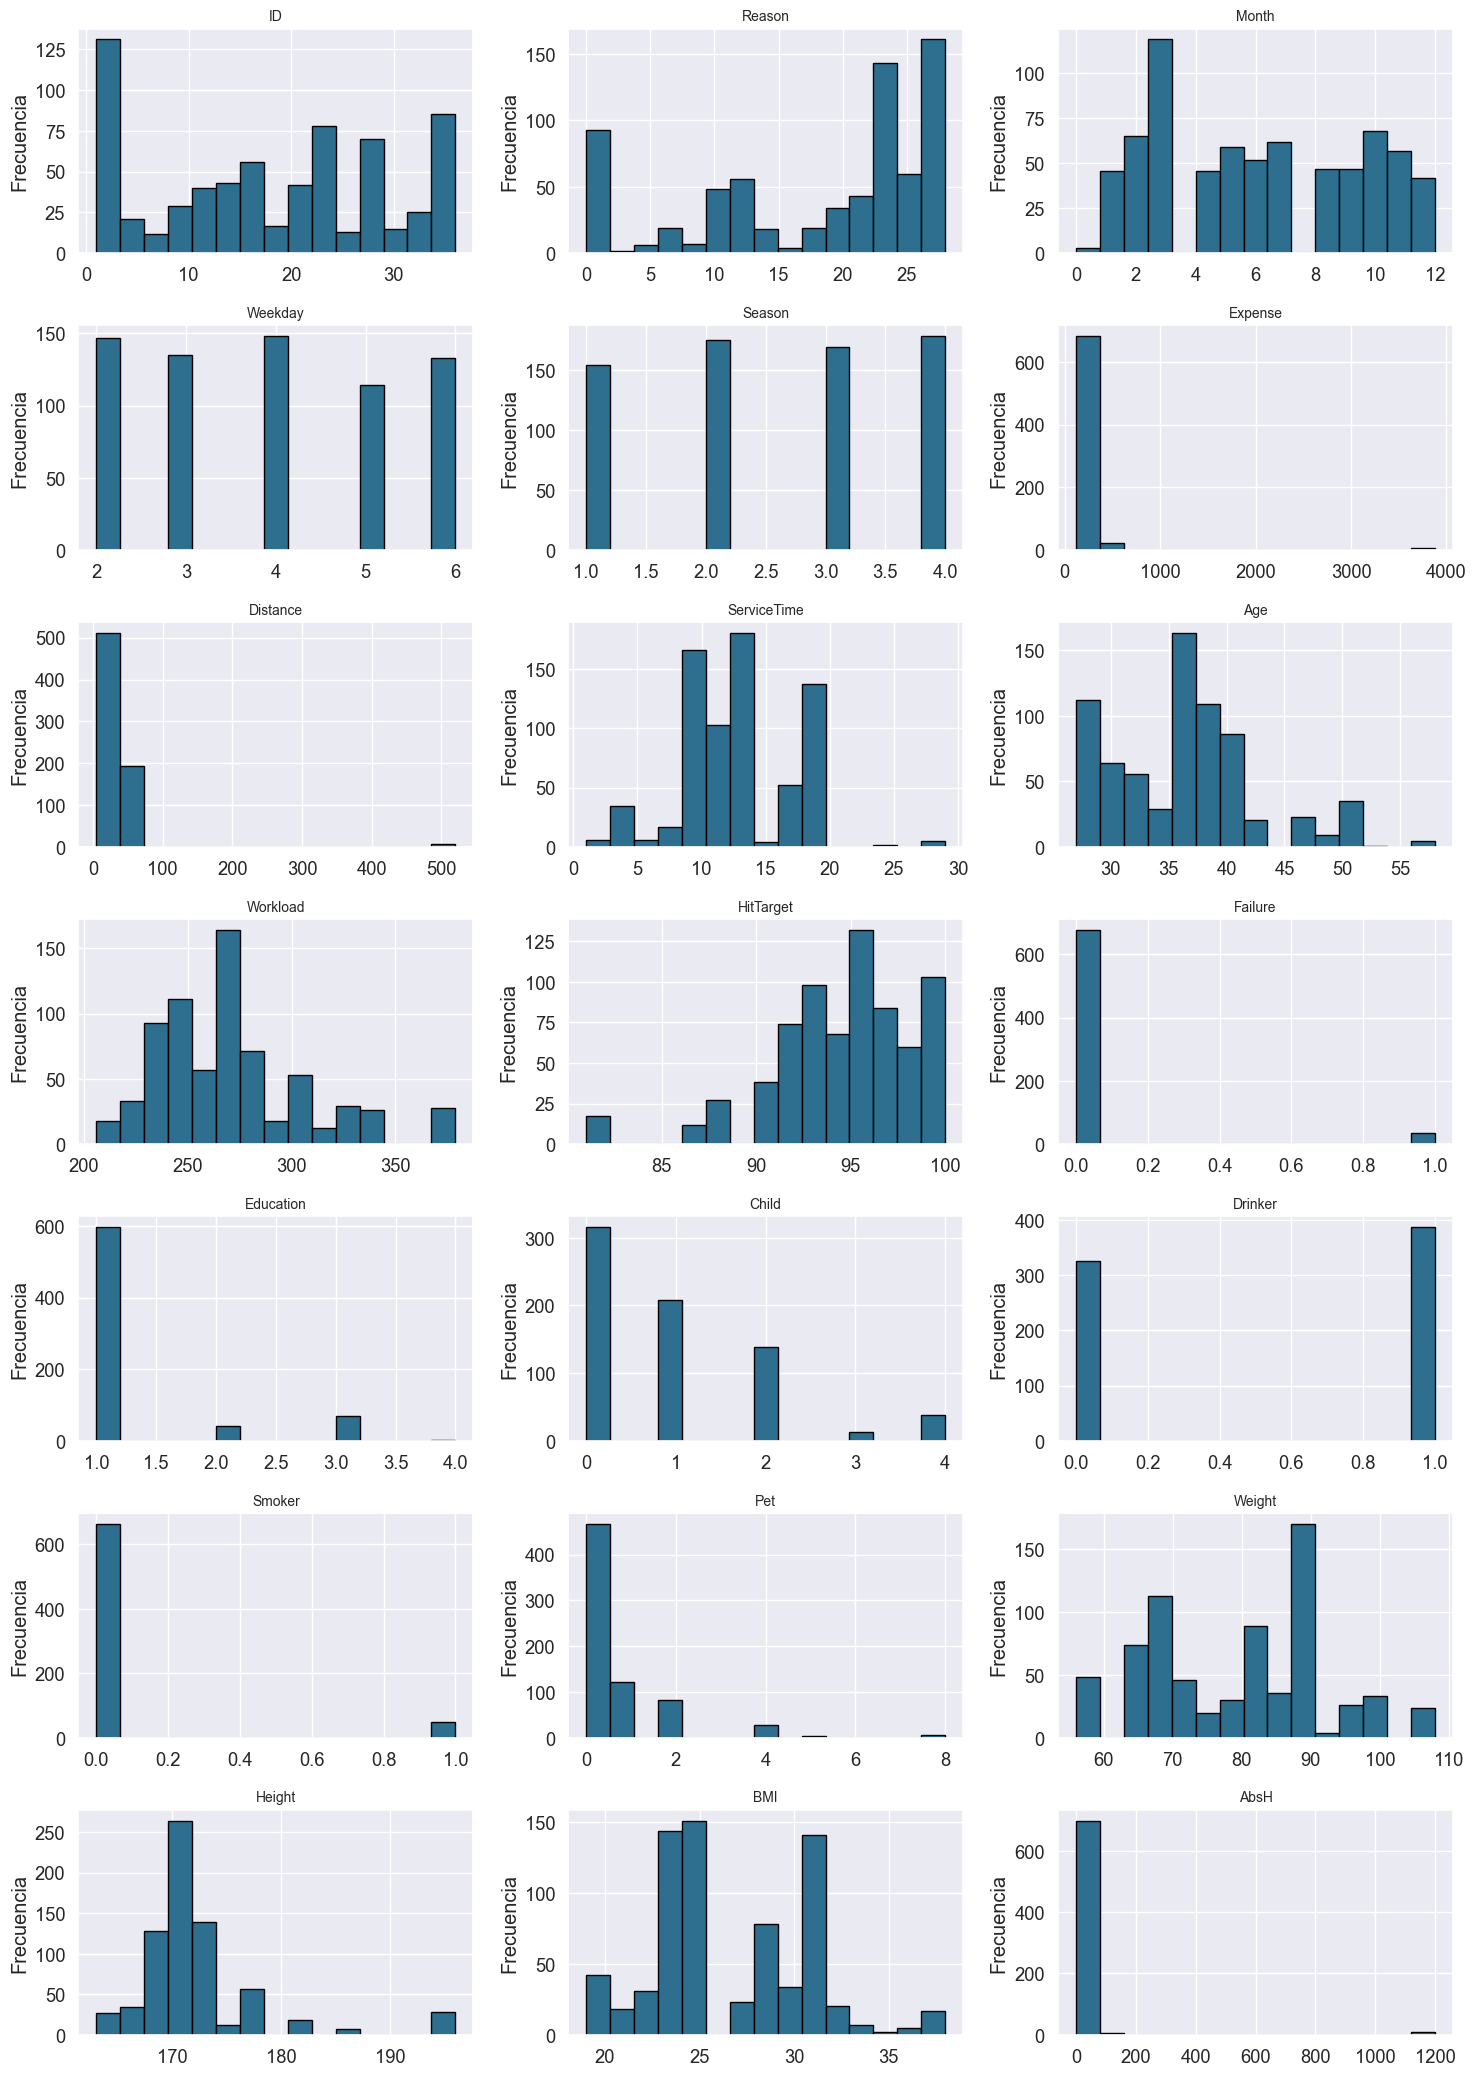

In [11]:
perColPlot(df)

Creemos algunas variables categoricas por su verdadero valor para mayor clarida.

In [12]:
df.loc[(df['Education'] == 1),'Edu_Text'] = 'High school'
df.loc[(df['Education'] == 2),'Edu_Text'] = 'Graduate'
df.loc[(df['Education'] == 3),'Edu_Text'] = 'Postgraduate'
df.loc[(df['Education'] == 4),'Edu_Text'] = 'Master and doctor'

In [13]:
df['Month'] = df['Month'].astype('category')
df['Weekday'] = df['Weekday'].astype('category')
df['Reason'] = df['Reason'].astype('category')
df['Failure'] = df['Failure'].astype('category')
df['Season'] = df['Season'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Edu_Text'] = df['Edu_Text'].astype('category')
df['Drinker'] = df['Drinker'].astype('category')
df['Smoker'] = df['Smoker'].astype('category')

## EDA

In [14]:
df.describe(include='all')

,ID,Reason,Month,Weekday,Season,Expense,Distance,ServiceTime,Age,Workload,...,Education,Child,Drinker,Smoker,Pet,Weight,Height,BMI,AbsH,Edu_Text
count,677.000000,713.0,713.0,677.0,676.0,713.000000,713.000000,713.000000,713.000000,713.000000,...,713.0,713.000000,713.0,713.0,713.000000,713.000000,713.000000,713.000000,713.000000,713
unique,NaN,27.0,13.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,4
top,NaN,23.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,High school
freq,NaN,140.0,119.0,148.0,178.0,NaN,NaN,NaN,NaN,NaN,...,597.0,NaN,387.0,664.0,NaN,NaN,NaN,NaN,NaN,597
mean,17.966027,NaN,NaN,NaN,NaN,261.847125,35.036466,12.640954,36.486676,271.146156,...,NaN,0.946704,NaN,NaN,0.676017,79.441795,172.082749,26.656381,20.014025,NaN
std,11.027549,NaN,NaN,NaN,NaN,391.081029,53.711713,4.269385,6.133822,37.632263,...,NaN,1.090031,NaN,NaN,1.270981,12.623760,6.022444,4.180078,126.410235,NaN
min,1.000000,NaN,NaN,NaN,NaN,118.000000,5.000000,1.000000,27.000000,205.917000,...,NaN,0.000000,NaN,NaN,0.000000,56.000000,163.000000,19.000000,0.000000,NaN
25%,9.000000,NaN,NaN,NaN,NaN,179.000000,16.000000,9.000000,32.000000,244.387000,...,NaN,0.000000,NaN,NaN,0.000000,69.000000,169.000000,24.000000,2.000000,NaN
50%,18.000000,NaN,NaN,NaN,NaN,225.000000,26.000000,13.000000,37.000000,265.017000,...,NaN,1.000000,NaN,NaN,0.000000,83.000000,170.000000,25.000000,3.000000,NaN
75%,28.000000,NaN,NaN,NaN,NaN,260.000000,50.000000,16.000000,40.000000,284.853000,...,NaN,2.000000,NaN,NaN,1.000000,89.000000,172.000000,31.000000,8.000000,NaN


Aca llama la atencion que el maximo sea 1200 horas cuando trabando 8 horas por dia eso significaria faltar 150 dias, entendemos que esto se puede considerar outliers porque no suele ocurrir que alguien falte medio año. 

In [15]:
len(df[df["AbsH"] >= 1200])

8

In [16]:
df = df[df["AbsH"] < 1200]

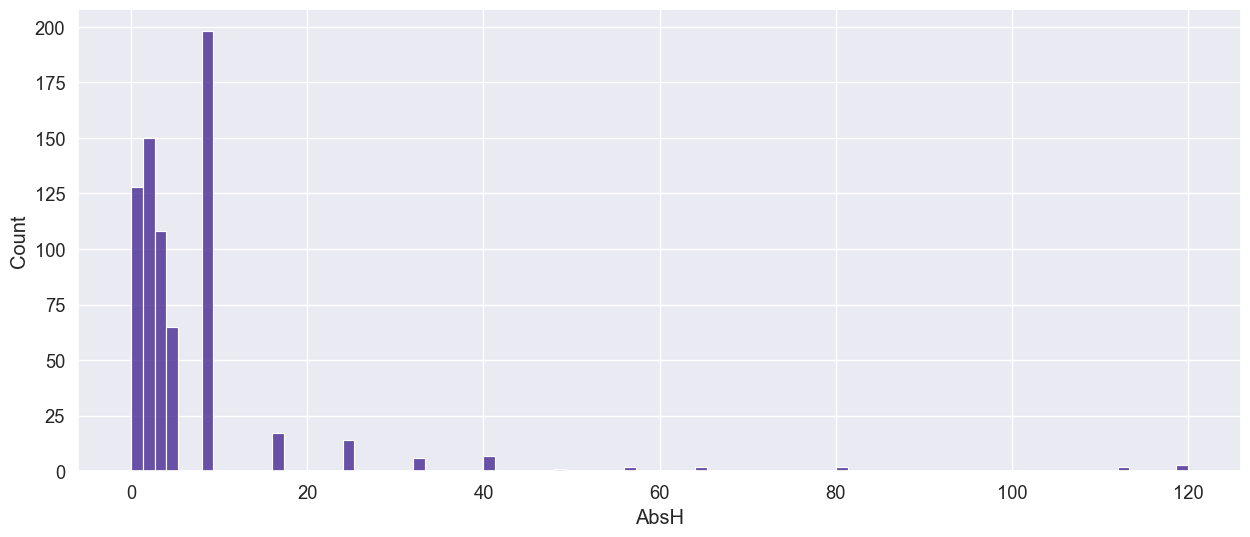

In [17]:
plt.figure(figsize = (15, 6))
sns.histplot(df['AbsH'], color = col, kde = False)
plt.show()

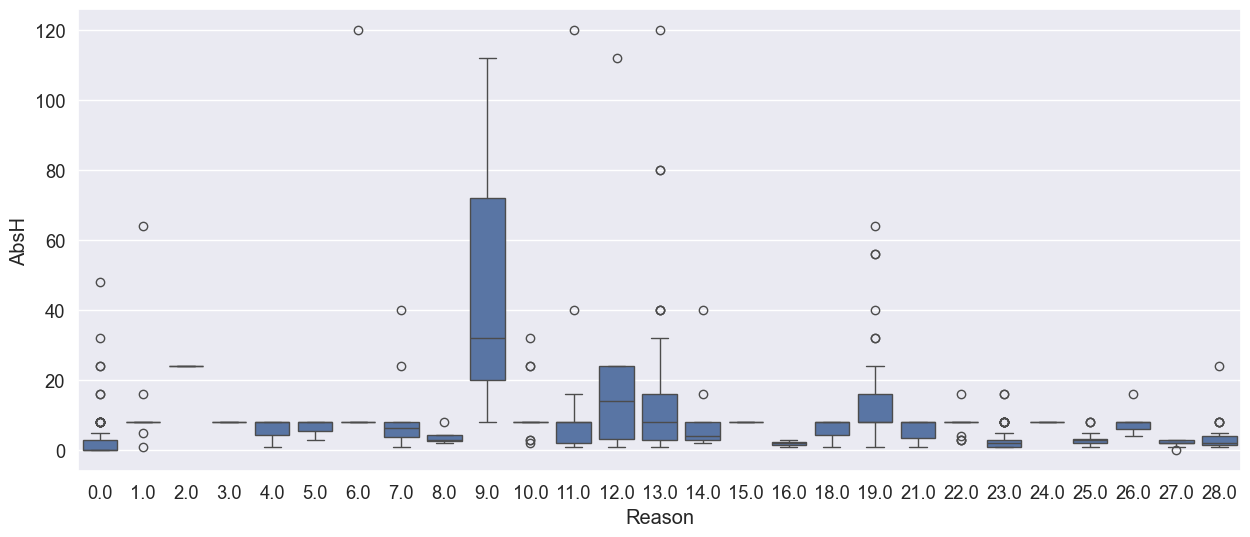

In [18]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = df['Reason'], y = df['AbsH'])
plt.show()

In [19]:
df[['ID','Month', 'Weekday','Reason', 'AbsH']] \
.sort_values(['AbsH', 'ID'], ascending = [0, 1])[:5]

,ID,Month,Weekday,Reason,AbsH
729,9.0,7.0,3.0,6.0,120.0
323,14.0,11.0,2.0,11.0,120.0
420,36.0,4.0,4.0,13.0,120.0
622,9.0,3.0,3.0,12.0,112.0
471,28.0,7.0,3.0,9.0,112.0


Aca se puede ver que por ejemplo, el empleado 14 estubo absente por 120 horas el martes de noviembre debido a la razon 11 (Diseases of the digestive system)

No queda claro como se distribuyen las Abssence hours ya que dan un dia y un mes pero 120 horas equivale a muchos dias de trabajo. Por lo tanto no sabemos si esto es absentismo acumulado, absentismo todos los martes de noviembre durante los 3 años que mide el dataset.

In [20]:
df[['ID','Month', 'Weekday','Reason', 'AbsH']] \
.sort_values(['AbsH', 'ID'], ascending = [1, 1])[:5]

,ID,Month,Weekday,Reason,AbsH
405,1.0,3.0,5.0,0.0,0.0
203,2.0,4.0,2.0,0.0,0.0
714,2.0,6.0,2.0,0.0,0.0
446,3.0,6.0,6.0,0.0,0.0
737,4.0,0.0,3.0,0.0,0.0


Esto es importante ya que sabemos que tambien incluye a empleados que nunca faltaron en ciertos meses y algunos que no faltaron nunca o eso entendemos por mes = 0

## Veamos el absentismo por fecha

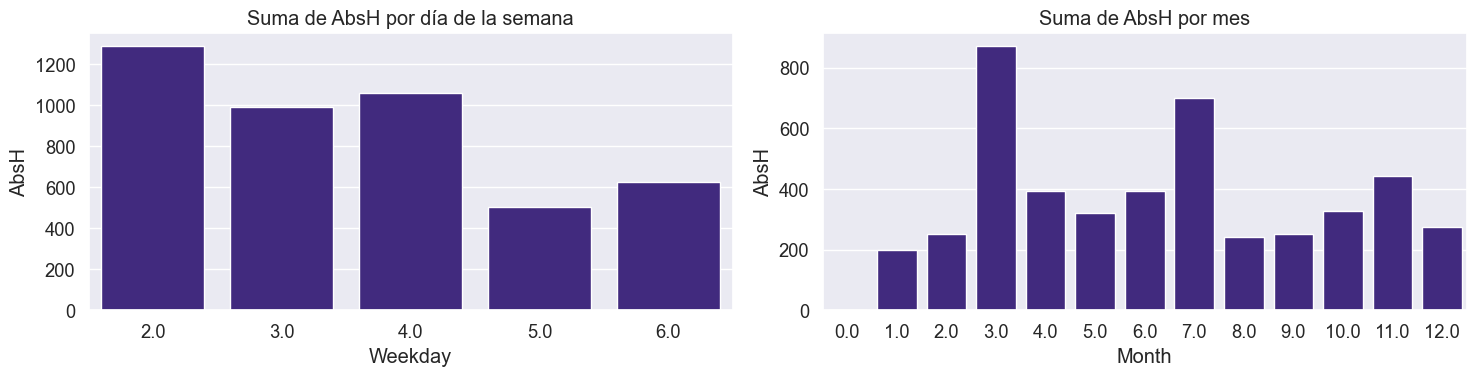

In [21]:
plt.figure(figsize=(15, 4))

weekday_sum = df.groupby('Weekday', observed=False)['AbsH'].sum().reset_index()
month_sum = df.groupby('Month', observed=False)['AbsH'].sum().reset_index()


plt.subplot(1, 2, 1)
sns.barplot(x='Weekday', y='AbsH', data=weekday_sum, color=col)
plt.title("Suma de AbsH por día de la semana")


plt.subplot(1, 2, 2)
sns.barplot(x='Month', y='AbsH', data=month_sum, color=col)
plt.title("Suma de AbsH por mes")

plt.tight_layout()
plt.show()

Puede ser interesante ver la relacion del absentismo con la convinacion mes dia

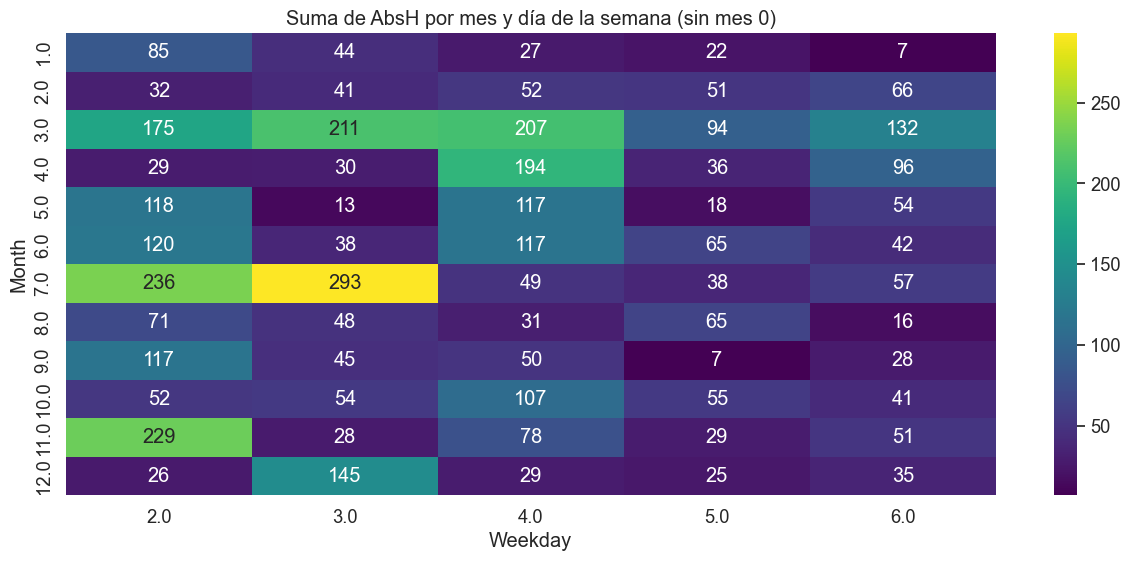

In [22]:
plt.figure(figsize=(15, 6))

heat_data = (
    df.groupby(['Month', 'Weekday'], observed=False)['AbsH']
      .sum()
      .unstack()
)

# 🔹 eliminar la fila correspondiente al mes 0 (sin error si no existe)
heat_data = heat_data.drop(index=[0, '0'], errors='ignore')

sns.heatmap(heat_data, annot=True, fmt='g', cmap=cm)
plt.title("Suma de AbsH por mes y día de la semana (sin mes 0)")
plt.show()

Aqui vemos que el dia que mas absentismo en horas se registra son los martes de julio, luego los lunes de julio y de noviembre

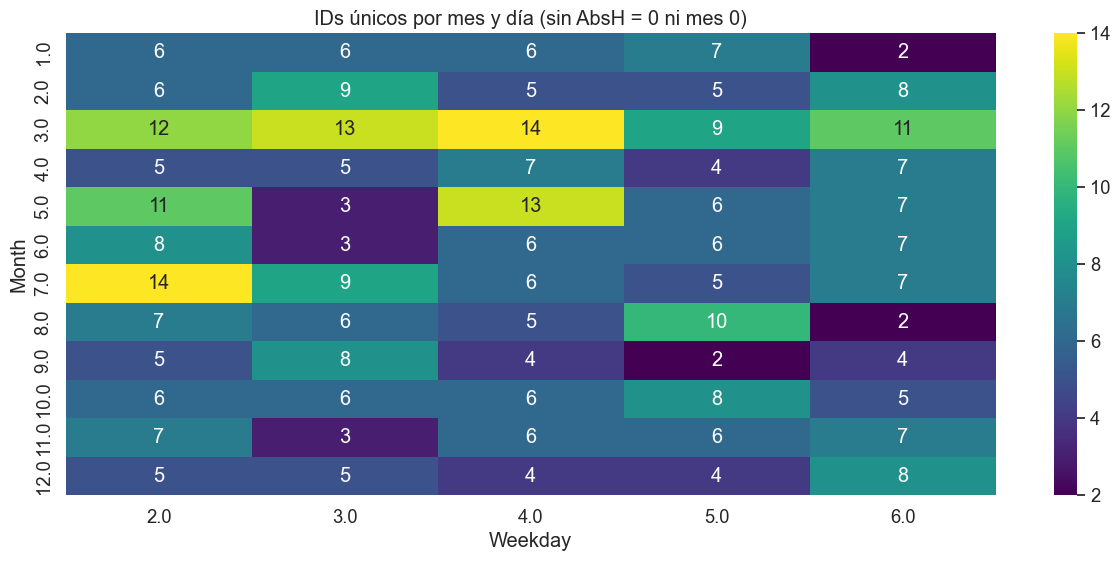

In [23]:
plt.figure(figsize=(15, 6))

heat_data = (
    df[df['AbsH'] != 0]  
      .groupby(['Month', 'Weekday'], observed=False)['ID']
      .nunique()
      .unstack()
)


heat_data = heat_data.drop(index=[0, '0'], errors='ignore')

sns.heatmap(heat_data, cmap=cm, annot=True, fmt='g')
plt.title("IDs únicos por mes y día (sin AbsH = 0 ni mes 0)")
plt.show()

Aca estamos viendo cuanta gente falto en cada mes/dia

Vemos que la convinacion con mas gente ausente son los lunes de julio y los miercoles de marzo y de mayo

## Veamos mas la relacion entre razon y absentismo

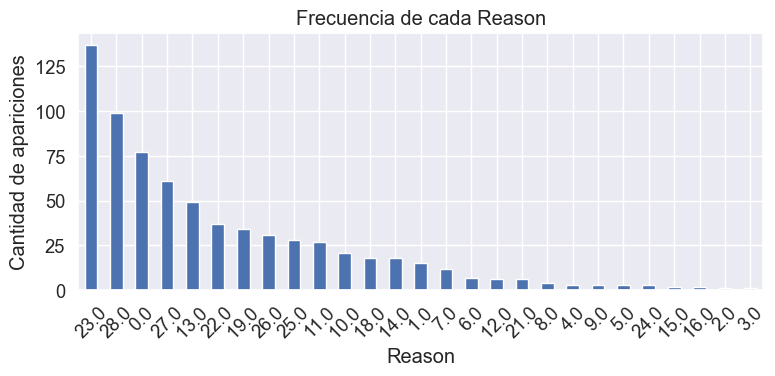

In [24]:
counts = df["Reason"].value_counts()

counts.plot(kind="bar", figsize=(8, 4))
plt.title("Frecuencia de cada Reason")
plt.xlabel("Reason")
plt.ylabel("Cantidad de apariciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
reason_df = pd.concat([
    df.groupby('Reason', observed=False)['AbsH'].sum(),
    df.groupby('Reason', observed=False)['ID'].nunique()
], axis=1, sort=False)

reason_df.columns = ['AbsH', 'AbsIDs']
reason_df.head(5)

,AbsH,AbsIDs
Reason,,
0.0,291.0,31
1.0,174.0,11
2.0,24.0,0
3.0,8.0,1
4.0,17.0,2


Se nos ocurre para poder mostrar esto y evitar graficas 3d que son dificiles de interpretar usar un scatter plot entre Reaason y AbsH con colores y distintos tamaños de punto para la cantidad de gente

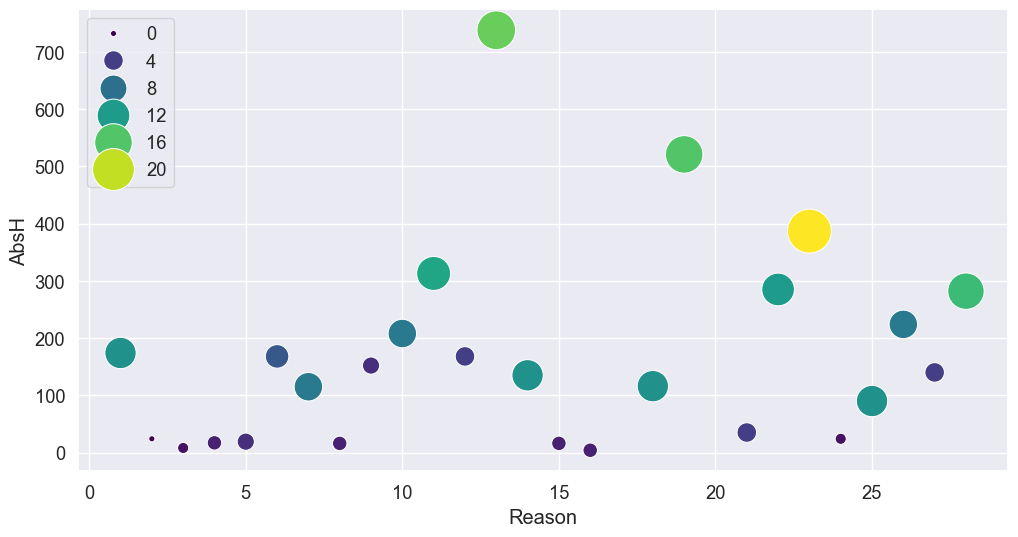

In [26]:
plt.figure(figsize = (12,6))
p1 = sns.scatterplot(x=reason_df.index[1:], y="AbsH", size="AbsIDs", hue ="AbsIDs", palette = cm,
                sizes=(20, 1000),data=reason_df[1:], markers = True)
plt.legend(loc='upper left')
plt.show()

In [27]:
reason_df.sort_values(['AbsH', 'AbsIDs'], ascending=[False, True])[:3]

,AbsH,AbsIDs
Reason,,
13.0,738.0,17
19.0,521.0,16
23.0,387.0,22


Vemos que las 3 reazones que mas tienen son: 

13: Diseases of the musculoskeletal system and connective tissue  
Con 738 horas acumuladas de 17 personas distintas

19:  Injury, poisoning and certain other consequences of external causes  
Con 521 horas acumuladas de 16 personas distintas.

23: medical consultation , con 387 horas acumuladas pero con la mayor cantidad de personas siendo 22 personas distintas las que faltaron por esta razon. 

### Concentrandonos en la cantidad de horas 

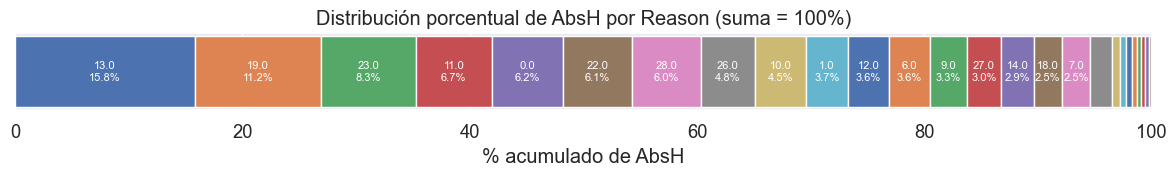

In [28]:
import matplotlib.pyplot as plt

reason_df = reason_df.sort_values('AbsH', ascending=False)
reason_df['perc'] = 100 * reason_df['AbsH'] / reason_df['AbsH'].sum()
reason_df['cum_perc'] = reason_df['perc'].cumsum()

fig, ax = plt.subplots(figsize=(12, 2))

prev = 0
for i, (reason, row) in enumerate(reason_df.iterrows()):
    ax.barh(0, row['perc'], left=prev, label=f"{reason}", height=0.5)
    prev += row['perc']

ax.set_xlim(0, 100)
ax.set_yticks([])
ax.set_xlabel('% acumulado de AbsH')
ax.set_title('Distribución porcentual de AbsH por Reason (suma = 100%)')


for i, (reason, row) in enumerate(reason_df.iterrows()):
    mid = row['perc'] / 2 + reason_df['perc'][:i].sum()
    if row['perc'] > 2:  
        ax.text(mid, 0, f"{reason}\n{row['perc']:.1f}%", ha='center', va='center', fontsize=8, color='white')

plt.tight_layout()
plt.show()

Esta grafica es muy util para ver que tanto de las faltas totales significa cada razon, en este caso vemos que las primeras 5 razones significan mas del 50% de las faltas

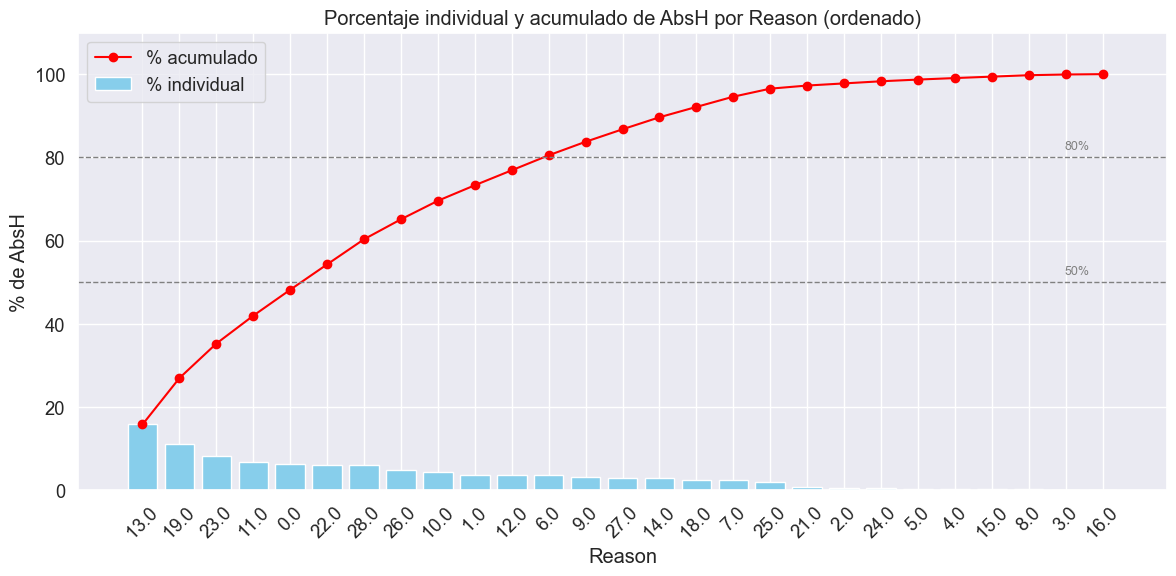

In [29]:
# Figura
fig, ax = plt.subplots(figsize=(12,6))

# Barras
bars = ax.bar(reason_df.index.astype(str), reason_df['perc'], color='skyblue', label='% individual')

# Línea acumulada
ax.plot(reason_df.index.astype(str), reason_df['cum_perc'], color='red', marker='o', label='% acumulado')

# Etiquetas
ax.set_xlabel('Reason')
ax.set_ylabel('% de AbsH')
ax.set_ylim(0, 110)
ax.set_title('Porcentaje individual y acumulado de AbsH por Reason (ordenado)')
ax.legend(loc='upper left')

# Línea guía 50%
ax.axhline(50, color='gray', linestyle='--', linewidth=1)
ax.text(len(reason_df)*0.95, 52, '50%', color='gray', ha='right', fontsize=9)
# Línea guía 80%
ax.axhline(80, color='gray', linestyle='--', linewidth=1)
ax.text(len(reason_df)*0.95, 82, '80%', color='gray', ha='right', fontsize=9)



plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Esto tambien para ver como las faltas se acumulan en su mayoria debido a un grupo de razones mientrass que otras razones, casi no generan absentismo, o no en relacion a la cantidad que genera el resto 

## Relacion entre razon y mes

Queremos ver si hay una relacion marcada aqui o no, creemos que tiene sentido que lo haya, por ejemplo seria comun que los resfrios aumenten en los meses de invierno

/var/folders/zx/wvgqdcqd1s550cz3bp0r0zd40000gn/T/ipykernel_69760/2247555653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(df[df['Reason'] != 0].groupby(['Month', 'Reason'])['AbsH'].sum().unstack(),


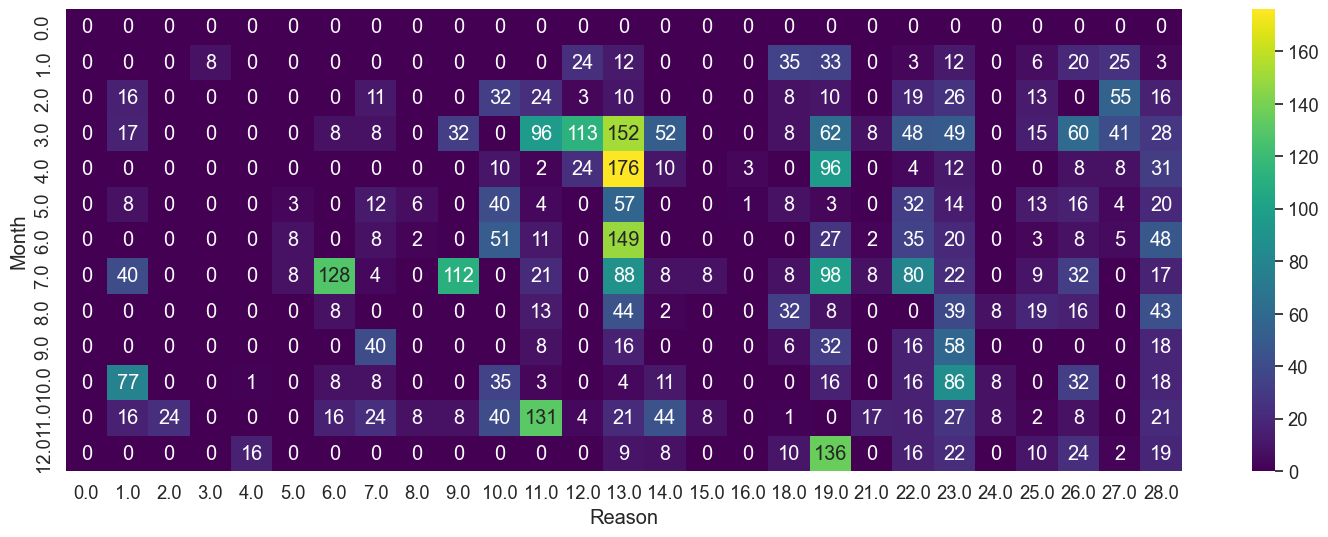

In [30]:
plt.figure(figsize = (18, 6))
sns.heatmap(df[df['Reason'] != 0].groupby(['Month', 'Reason'])['AbsH'].sum().unstack(), 
            cmap = cm, annot = True, fmt = 'g')
plt.show() 

La relacion mas marcada es entre la razon 13 y el mes 4, pero dado que la razon 13 es Diseases of the musculoskeletal system and connective tissue creemos que debe ser por un caso puntual de un empleado mas que por una real correlacion de estos dos hechos. 

## EDA con respecto a la data del empleado 

Para agrupar la data de un usuario nos quedaremos con el max de cada valor, es decir, su mayor peso, edad, cantidad de hijos y si en un registro figura que fuma y en otro que no considerearemos que fuma para este analisis.

In [31]:
age = df['Age'].groupby(df['ID']).max()
edu = pd.to_numeric(df['Education']).groupby(df['ID']).max().astype('category')
son = df['Child'].groupby(df['ID']).max()
drink = pd.to_numeric(df['Drinker']).groupby(df['ID']).max().astype('category')
smoke = pd.to_numeric(df['Smoker']).groupby(df['ID']).max().astype('category')
fail = pd.to_numeric(df['Failure']).groupby(df['ID']).max().astype('category')
pet = df['Pet'].groupby(df['ID']).max()
service = df['ServiceTime'].groupby(df['ID']).max()
weight = df['Weight'].groupby(df['ID']).max()
height = df['Height'].groupby(df['ID']).max()
bmi = df['BMI'].groupby(df['ID']).max()
exp = df['Expense'].groupby(df['ID']).max()
dist = df['Distance'].groupby(df['ID']).max()
absh = df['AbsH'].groupby(df['ID']).sum()
reason = df[df['Reason'] != 0].groupby('ID')['Reason'].nunique()

Para el rendimiento y carga laboral preferimos guardar min max y mean para poder hacer un analisis mas variado 

In [32]:

#new features 
hitmax = df['HitTarget'].groupby(df['ID']).max()
hitmin = df['HitTarget'].groupby(df['ID']).min()
hitmean = round(df['HitTarget'].groupby(df['ID']).mean(),2)
wlmax = round(df['Workload'].groupby(df['ID']).max(),2)
wlmin = round(df['Workload'].groupby(df['ID']).min(),2)
wlmean = round(df['Workload'].groupby(df['ID']).mean(),2)

In [33]:
ind_df = pd.concat([age, edu, son, drink, smoke, fail, pet, hitmax, hitmin, hitmean, 
                    wlmax, wlmin, wlmean, service, weight, height, bmi, exp,dist,reason,absh], axis=1, sort=False)

ind_df.columns = ['Age', 'Education', 'Child', 'Drinker', 'Smoker', 'Failure', 'Pet',
       'HT_Max', 'HT_Min', 'HT_Mean', 'WL_Max', 'WL_Min',
       'WL_Mean', 'ServiceTime', 'Weight', 'Height', 'BMI', 'Expense',
       'Distance', 'R_Count', 'AH_Sum']

In [34]:
ind_df.loc[(ind_df['Education'] == 1),'Edu_Text'] = 'High school'
ind_df.loc[(ind_df['Education'] == 2),'Edu_Text'] = 'Graduate'
ind_df.loc[(ind_df['Education'] == 3),'Edu_Text'] = 'Postgraduate'
ind_df.loc[(ind_df['Education'] == 4),'Edu_Text'] = 'Master and doctor'

In [35]:
ind_df['R_Count'] = ind_df['R_Count'].fillna(0)

In [36]:
ind_df.head()

,Age,Education,Child,Drinker,Smoker,Failure,Pet,HT_Max,HT_Min,HT_Mean,...,WL_Mean,ServiceTime,Weight,Height,BMI,Expense,Distance,R_Count,AH_Sum,Edu_Text
ID,,,,,,,,,,,,,,,,,,,,,
1.0,37.0,3.0,1.0,0.0,0.0,1.0,1.0,100.0,88.0,95.64,...,266.30,14.0,88.0,172.0,29.0,235.0,26.0,10.0,96.0,Postgraduate
2.0,48.0,1.0,1.0,0.0,1.0,1.0,5.0,96.0,92.0,93.33,...,240.94,12.0,88.0,170.0,33.0,235.0,520.0,3.0,25.0,High school
3.0,38.0,1.0,0.0,1.0,0.0,1.0,0.0,100.0,81.0,95.09,...,262.43,18.0,89.0,170.0,31.0,3880.0,51.0,10.0,454.0,High school
4.0,40.0,1.0,1.0,1.0,0.0,0.0,0.0,95.0,95.0,95.00,...,271.22,13.0,98.0,170.0,34.0,118.0,14.0,0.0,0.0,High school
5.0,43.0,1.0,1.0,1.0,0.0,1.0,0.0,100.0,81.0,91.90,...,265.06,13.0,106.0,167.0,38.0,235.0,26.0,4.0,112.0,High school


## Workload

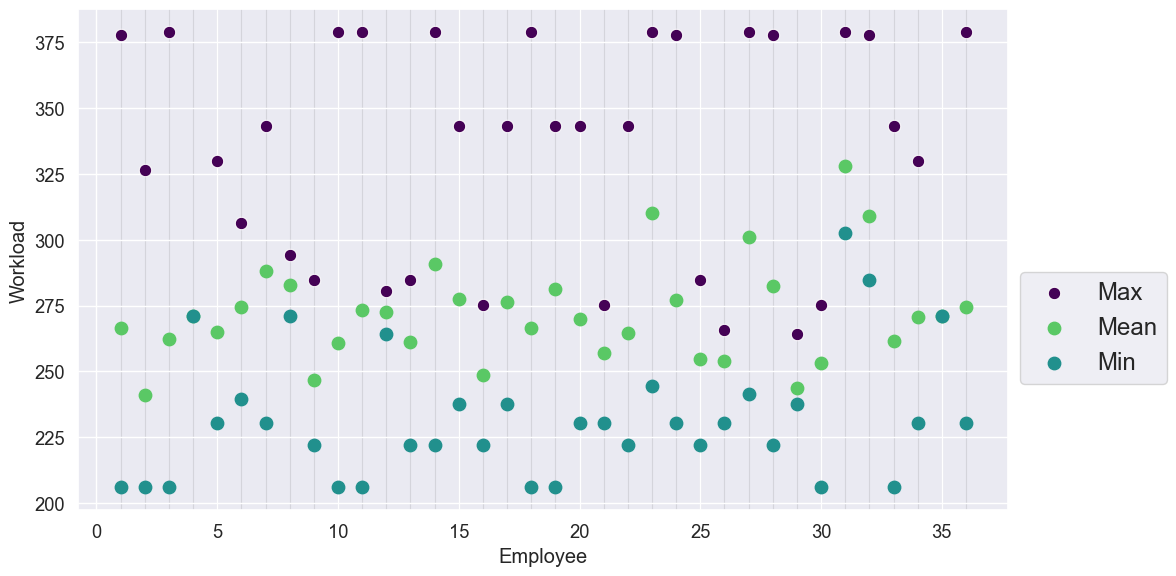

In [37]:
plt.figure(figsize=(12, 6))

# Líneas verticales suaves por cada empleado
for x in ind_df.index:
    plt.axvline(x=x, color='gray', alpha=0.2, linewidth=0.8, zorder=0)

# Puntos
sns.scatterplot(x=ind_df.index, y=ind_df['WL_Max'], color='#450256', s=80, label='Max')
plt.scatter(ind_df.index, ind_df['WL_Mean'], color='#5AC865', s=80, label='Mean')
plt.scatter(ind_df.index, ind_df['WL_Min'], color='#21908D', s=80, label='Min')

# Etiquetas y formato
plt.ylabel('Workload')
plt.xlabel('Employee')
plt.legend(fontsize='large', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

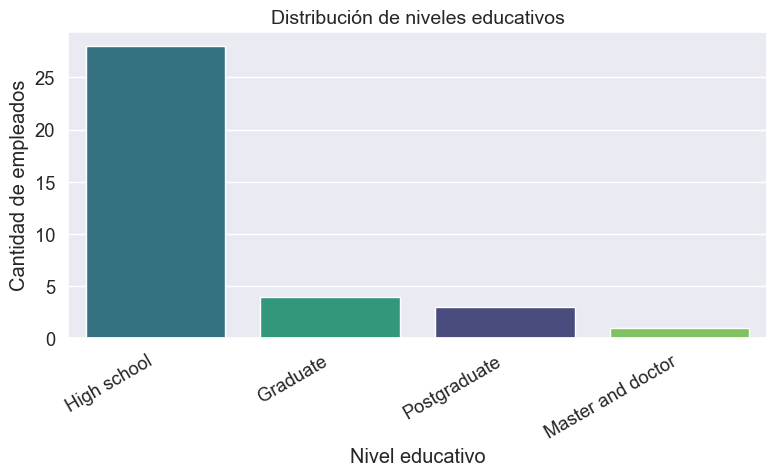

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Edu_Text',
    hue='Edu_Text',
    data=ind_df,
    palette='viridis',
    order=['High school', 'Graduate', 'Postgraduate', 'Master and doctor']
)
plt.title('Distribución de niveles educativos', fontsize=14)
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

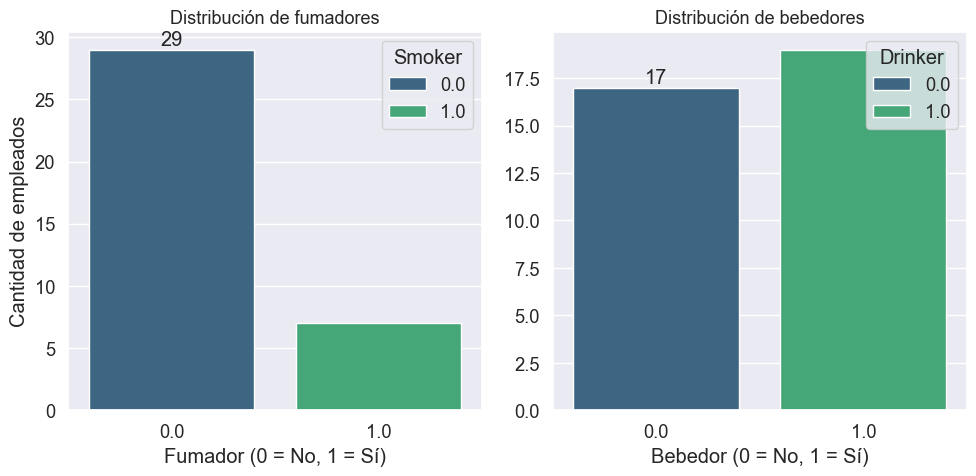

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Smoker
sns.countplot(
    x='Smoker',
    hue='Smoker',
    data=ind_df,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Distribución de fumadores', fontsize=13)
axes[0].set_xlabel('Fumador (0 = No, 1 = Sí)')
axes[0].set_ylabel('Cantidad de empleados')
axes[0].bar_label(axes[0].containers[0])

# Drinker
sns.countplot(
    x='Drinker',
    hue='Drinker',
    data=ind_df,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Distribución de bebedores', fontsize=13)
axes[1].set_xlabel('Bebedor (0 = No, 1 = Sí)')
axes[1].set_ylabel('')
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

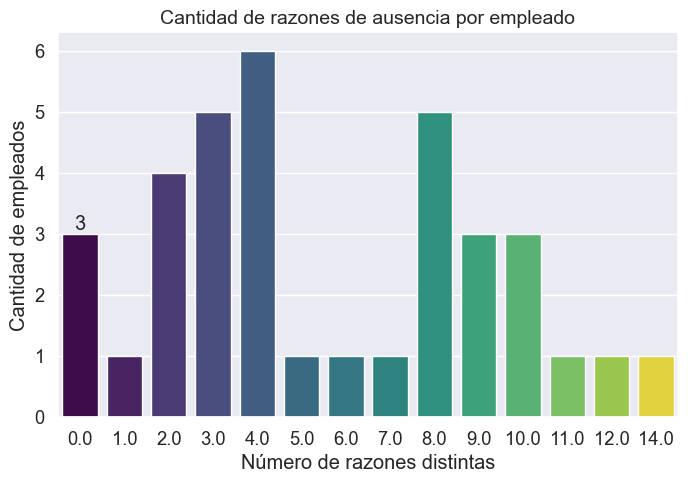

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='R_Count',
    hue='R_Count',
    data=ind_df,
    palette='viridis'
)
plt.title('Cantidad de razones de ausencia por empleado', fontsize=14)
plt.xlabel('Número de razones distintas')
plt.ylabel('Cantidad de empleados')
plt.legend([], [], frameon=False) 
plt.bar_label(plt.gca().containers[0])
plt.show()


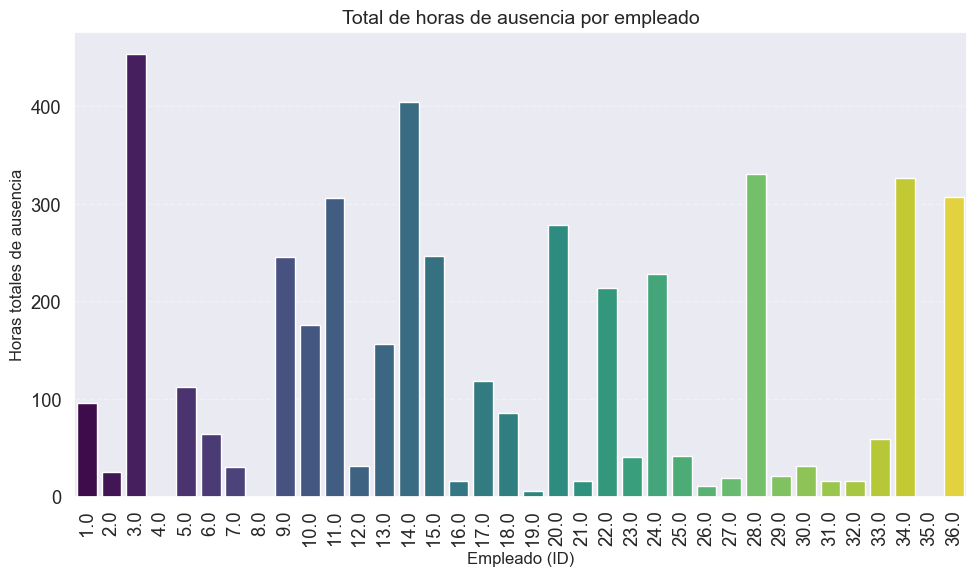

In [41]:
plt.figure(figsize=(10,6))

# Ordenar empleados por horas de ausencia
sorted_abs = ind_df.sort_values(by='AH_Sum', ascending=False).reset_index()

sns.barplot(
    x='ID',
    hue='ID',
    y='AH_Sum',
    data=sorted_abs,
    palette='viridis'
)

plt.title('Total de horas de ausencia por empleado', fontsize=14)
plt.xlabel('Empleado (ID)', fontsize=12)
plt.ylabel('Horas totales de ausencia', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend([], [], frameon=False) 
plt.tight_layout()
plt.show()

# Prediccion

Funcion para generalizar la prueba de los modelos (Considre colapsar el siguiente code block para facilitar legibilidad)

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
import time


def evaluate_model(model, model_name, X_train, X_test, y_train, y_test,
                   needs_scaling=True, show_feature_importance=True):
    """
    Evalúa cualquier modelo de clasificación y genera visualizaciones completas.
    
    Parameters:
    -----------
    model : sklearn estimator
        Modelo a evaluar (sin entrenar)
    model_name : str
        Nombre del modelo para títulos
    X_train, X_test, y_train, y_test : arrays
        Datos de entrenamiento y prueba
    needs_scaling : bool
        Si el modelo requiere escalado (True para Logistic y KNN, False para RF)
    show_feature_importance : bool
        Si mostrar importancia de features (solo para algunos modelos)
    
    Returns:
    --------
    dict : Diccionario con todas las métricas
    """

    # Escalado si es necesario
    if needs_scaling:
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train)
        X_test_processed = scaler.transform(X_test)
    else:
        X_train_processed = X_train
        X_test_processed = X_test

    # Entrenar modelo y medir tiempo
    print(f"\n{'=' * 60}")
    print(f"ENTRENANDO: {model_name}")
    print(f"{'=' * 60}")

    start_time = time.time()
    model.fit(X_train_processed, y_train)
    train_time = time.time() - start_time

    # Predicciones
    start_time = time.time()
    y_pred = model.predict(X_test_processed)
    pred_time = time.time() - start_time

    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

    # Validación cruzada
    cv_scores = cross_val_score(model, X_train_processed, y_train,
                                cv=5, scoring='accuracy')

    # Calcular métricas
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred),  # Matthews Correlation Coefficient
        'CV_Accuracy_Mean': cv_scores.mean(),
        'CV_Accuracy_Std': cv_scores.std(),
        'Train_Time': train_time,
        'Pred_Time': pred_time
    }

    # Imprimir resultados
    print(f"\n{'=' * 60}")
    print(f"RESULTADOS: {model_name}")
    print(f"{'=' * 60}")
    print(f"Accuracy:           {metrics['Accuracy']:.4f}")
    print(f"Precision:          {metrics['Precision']:.4f}")
    print(f"Recall:             {metrics['Recall']:.4f}")
    print(f"F1-Score:           {metrics['F1-Score']:.4f}")
    print(f"MCC:                {metrics['MCC']:.4f}")
    print(f"Tiempo entrenamiento: {metrics['Train_Time']:.4f}s")
    print(f"Tiempo predicción:    {metrics['Pred_Time']:.4f}s")

    # Crear visualizaciones
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.5, wspace=0.5, height_ratios=[1, 1, 1.5])

    # 1. Matriz de Confusión
    ax1 = fig.add_subplot(gs[0, 0])
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax1,
                xticklabels=['Bajo', 'Alto'], yticklabels=['Bajo', 'Alto'])
    ax1.set_title(f'Matriz de Confusión\n{model_name}', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Valor Real')
    ax1.set_xlabel('Predicción')

    # 2. Matriz de Confusión Normalizada (porcentajes)
    ax2 = fig.add_subplot(gs[0, 1])
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='viridis', ax=ax2,
                xticklabels=['Bajo', 'Alto'], yticklabels=['Bajo', 'Alto'])
    ax2.set_title(f'Matriz Normalizada (%)\n{model_name}', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Valor Real')
    ax2.set_xlabel('Predicción')

    # 3. Métricas en barras
    ax3 = fig.add_subplot(gs[0, 2])
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MCC']
    metric_values = [metrics[m] for m in metric_names]
    colors = plt.cm.viridis(np.linspace(0, 1, len(metric_names)))
    bars = ax3.barh(metric_names, metric_values, color=colors)
    ax3.set_xlim([0, 1])
    ax3.set_xlabel('Score')
    ax3.set_title(f'Métricas de Rendimiento\n{model_name}', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3, axis='x')
    # Añadir valores en las barras
    for i, (bar, val) in enumerate(zip(bars, metric_values)):
        ax3.text(val + 0.02, i, f'{val:.3f}', va='center', fontsize=9)

    # 4. Distribución de probabilidades
    ax4 = fig.add_subplot(gs[1, :2])
    ax4.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.6,
             label='Clase 0 (Real)', color='#21908D', edgecolor='black')
    ax4.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.6,
             label='Clase 1 (Real)', color='#440154', edgecolor='black')
    ax4.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Umbral = 0.5')
    ax4.set_xlabel('Probabilidad Predicha')
    ax4.set_ylabel('Frecuencia')
    ax4.set_title(f'Distribución de Probabilidades por Clase Real\n{model_name}',
                  fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(alpha=0.3)

    # 5. Errores por clase (FP, FN, TP, TN)
    ax5 = fig.add_subplot(gs[1, 2])
    tn, fp, fn, tp = cm.ravel()
    error_data = {
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn
    }
    colors_errors = ['#21908D', '#21908D', '#FDE724', '#FDE724']
    bars = ax5.bar(error_data.keys(), error_data.values(), color=colors_errors, alpha=0.7)
    ax5.set_ylabel('Cantidad')
    ax5.set_title(f'Distribución de Predicciones\n{model_name}',
                  fontsize=12, fontweight='bold')
    ax5.grid(alpha=0.3, axis='y')
    plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45, ha='right')
    for bar, val in zip(bars, error_data.values()):
        ax5.text(bar.get_x() + bar.get_width() / 2, val + max(error_data.values()) * 0.02,
                 f'{val}', ha='center', va='bottom', fontsize=10)

    # 6. Feature Importance (si aplica)
    if show_feature_importance:
        ax6 = fig.add_subplot(gs[2, :])

        # Obtener importancia según tipo de modelo
        if hasattr(model, 'feature_importances_'):
            # Random Forest, XGBoost, etc.
            importances = model.feature_importances_
            title_suffix = '(Gini Importance)'
        elif hasattr(model, 'coef_'):
            # Logistic Regression, SVM lineal
            importances = np.abs(model.coef_[0])
            title_suffix = '(|Coeficientes|)'
        else:
            # KNN u otros sin feature importance
            ax6.text(0.5, 0.5, 'Feature importance no disponible\npara este tipo de modelo',
                     ha='center', va='center', fontsize=12)
            ax6.axis('off')
            importances = None

        if importances is not None:
            feature_imp = pd.DataFrame({
                'Feature': X_train.columns,
                'Importance': importances
            }).sort_values('Importance', ascending=False).head(15)

            colors_imp = plt.cm.viridis(np.linspace(0, 1, len(feature_imp)))
            ax6.barh(range(len(feature_imp)), feature_imp['Importance'], color=colors_imp)
            ax6.set_yticks(range(len(feature_imp)))
            ax6.set_yticklabels(feature_imp['Feature'], fontsize=10)
            ax6.invert_yaxis()
            ax6.set_xlabel('Importancia', fontsize=11)
            ax6.set_title(f'Top 15 Features más Importantes {title_suffix}\n{model_name}',
                          fontsize=13, fontweight='bold')
            ax6.grid(alpha=0.3, axis='x')

    plt.suptitle(f'EVALUACIÓN COMPLETA: {model_name}',
                 fontsize=16, fontweight='bold', y=0.998)
    plt.show()

    return metrics

## Preparacion de datos

In [86]:
X = df.drop(['AbsH', 'ID', 'Edu_Text', 'Reason'], axis=1)

# Convertir categóricas
categorical_cols = X.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

X = X.fillna(X.median())
y = np.where(df["AbsH"] > df["AbsH"].median(), 1, 0)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dataset preparado: {X.shape[0]} muestras, {X.shape[1]} features")
print(f"Train: {len(X_train)} | Test: {len(X_test)}")


Dataset preparado: 705 muestras, 18 features
Train: 493 | Test: 212


## Regresion logistica


ENTRENANDO: Logistic Regression

RESULTADOS: Logistic Regression
Accuracy:           0.6509
Precision:          0.6122
Recall:             0.6250
F1-Score:           0.6186
MCC:                0.2969
Tiempo entrenamiento: 0.0037s
Tiempo predicción:    0.0001s


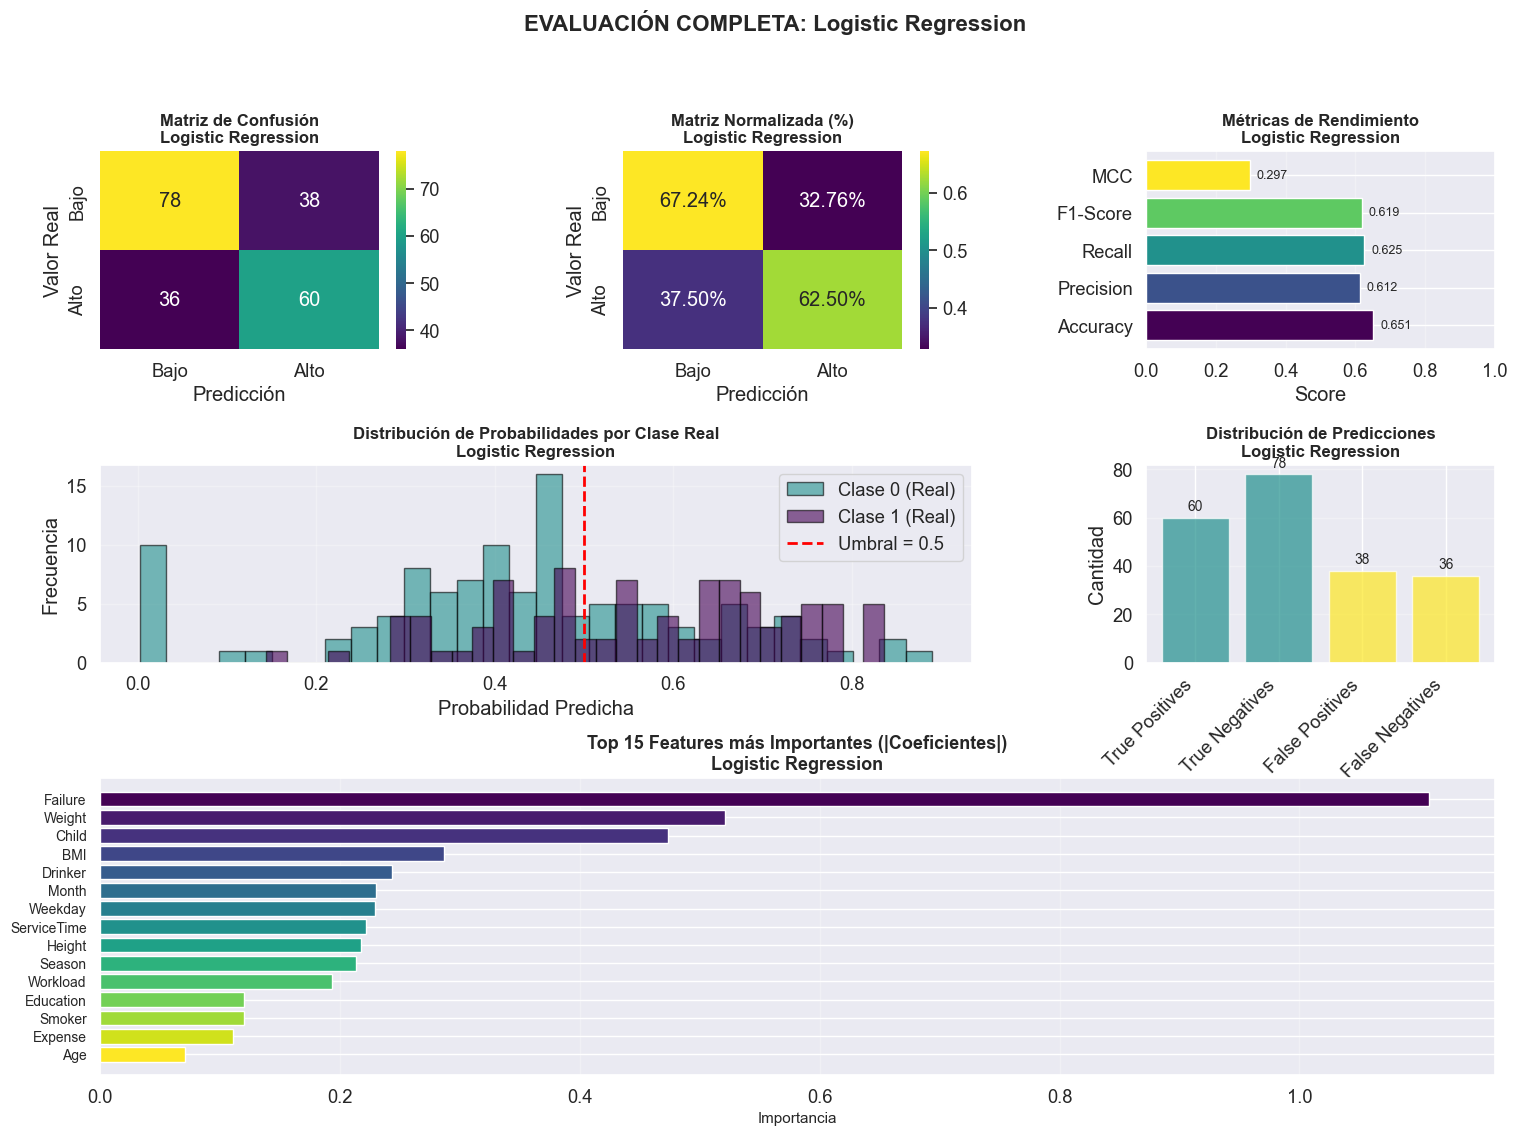

In [87]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
metrics_lr = evaluate_model(log_reg, 'Logistic Regression', 
                            X_train, X_test, y_train, y_test, 
                            needs_scaling=True)

## Random Forest


ENTRENANDO: Random Forest

RESULTADOS: Random Forest
Accuracy:           0.7170
Precision:          0.6800
Recall:             0.7083
F1-Score:           0.6939
MCC:                0.4312
Tiempo entrenamiento: 0.1373s
Tiempo predicción:    0.0279s


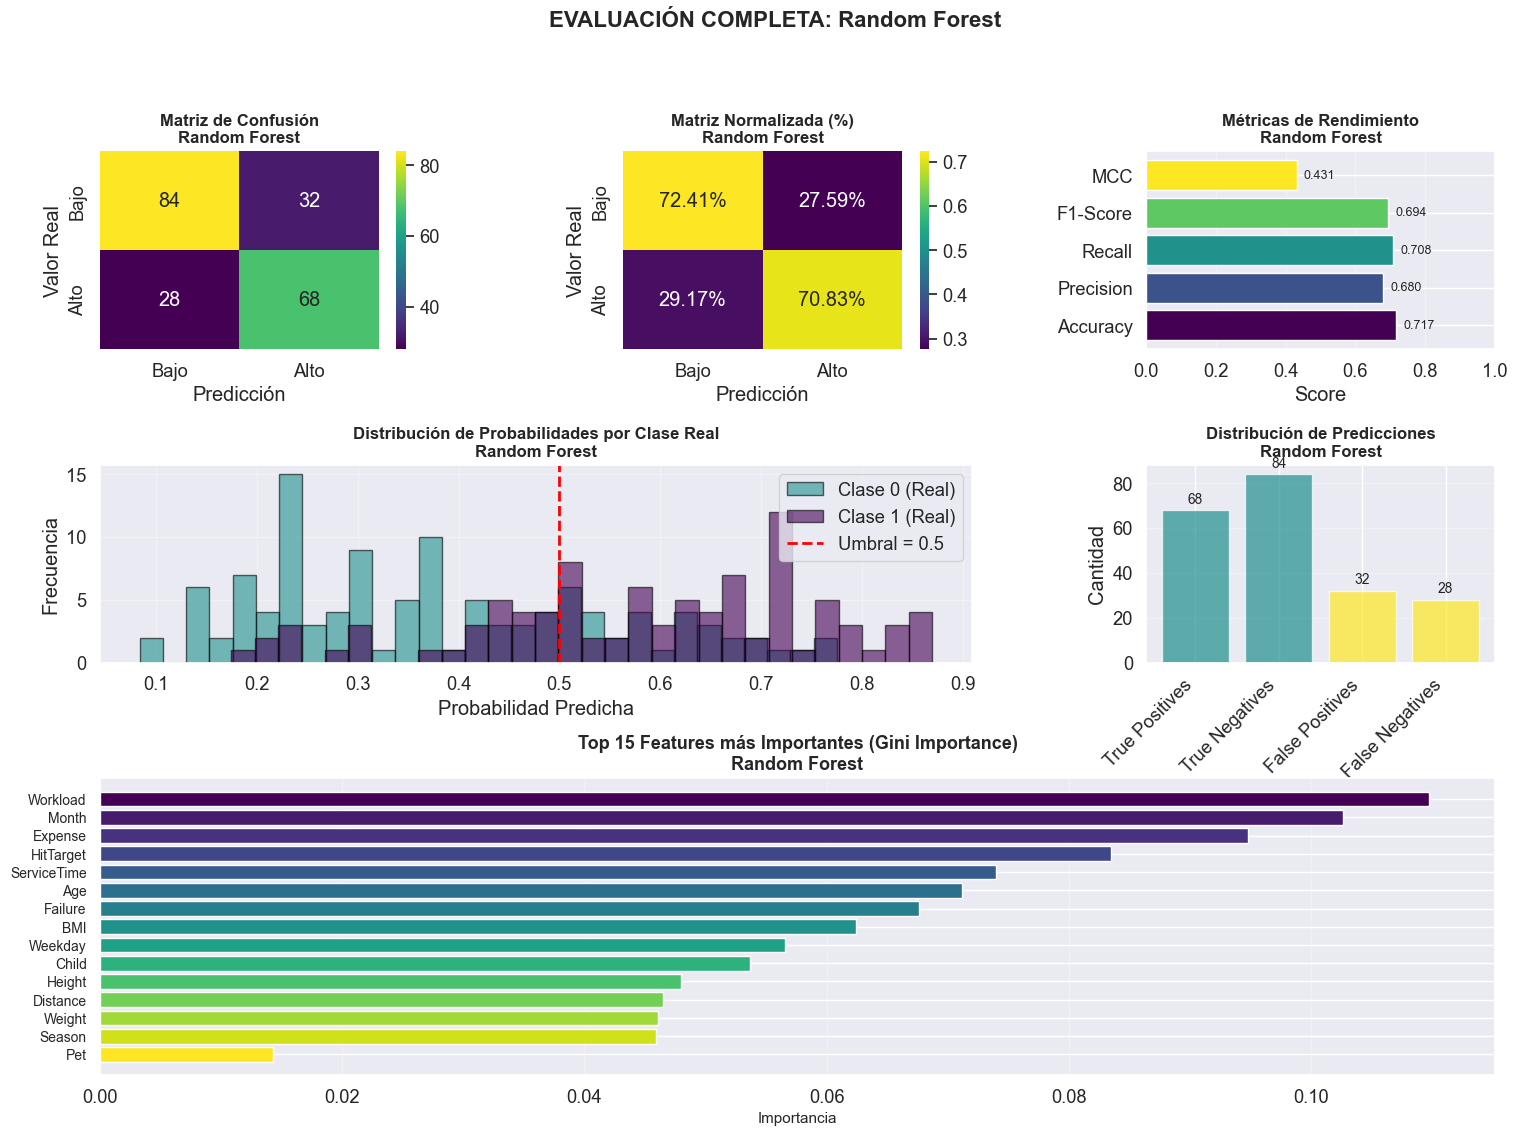

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=10,
    min_samples_leaf=5, random_state=42, class_weight='balanced', n_jobs=-1
)
metrics_rf = evaluate_model(rf_model, 'Random Forest', 
                            X_train, X_test, y_train, y_test, 
                            needs_scaling=False)


## KNN


ENTRENANDO: K-Nearest Neighbors

RESULTADOS: K-Nearest Neighbors
Accuracy:           0.6887
Precision:          0.6923
Recall:             0.5625
F1-Score:           0.6207
MCC:                0.3671
Tiempo entrenamiento: 0.0006s
Tiempo predicción:    0.0124s


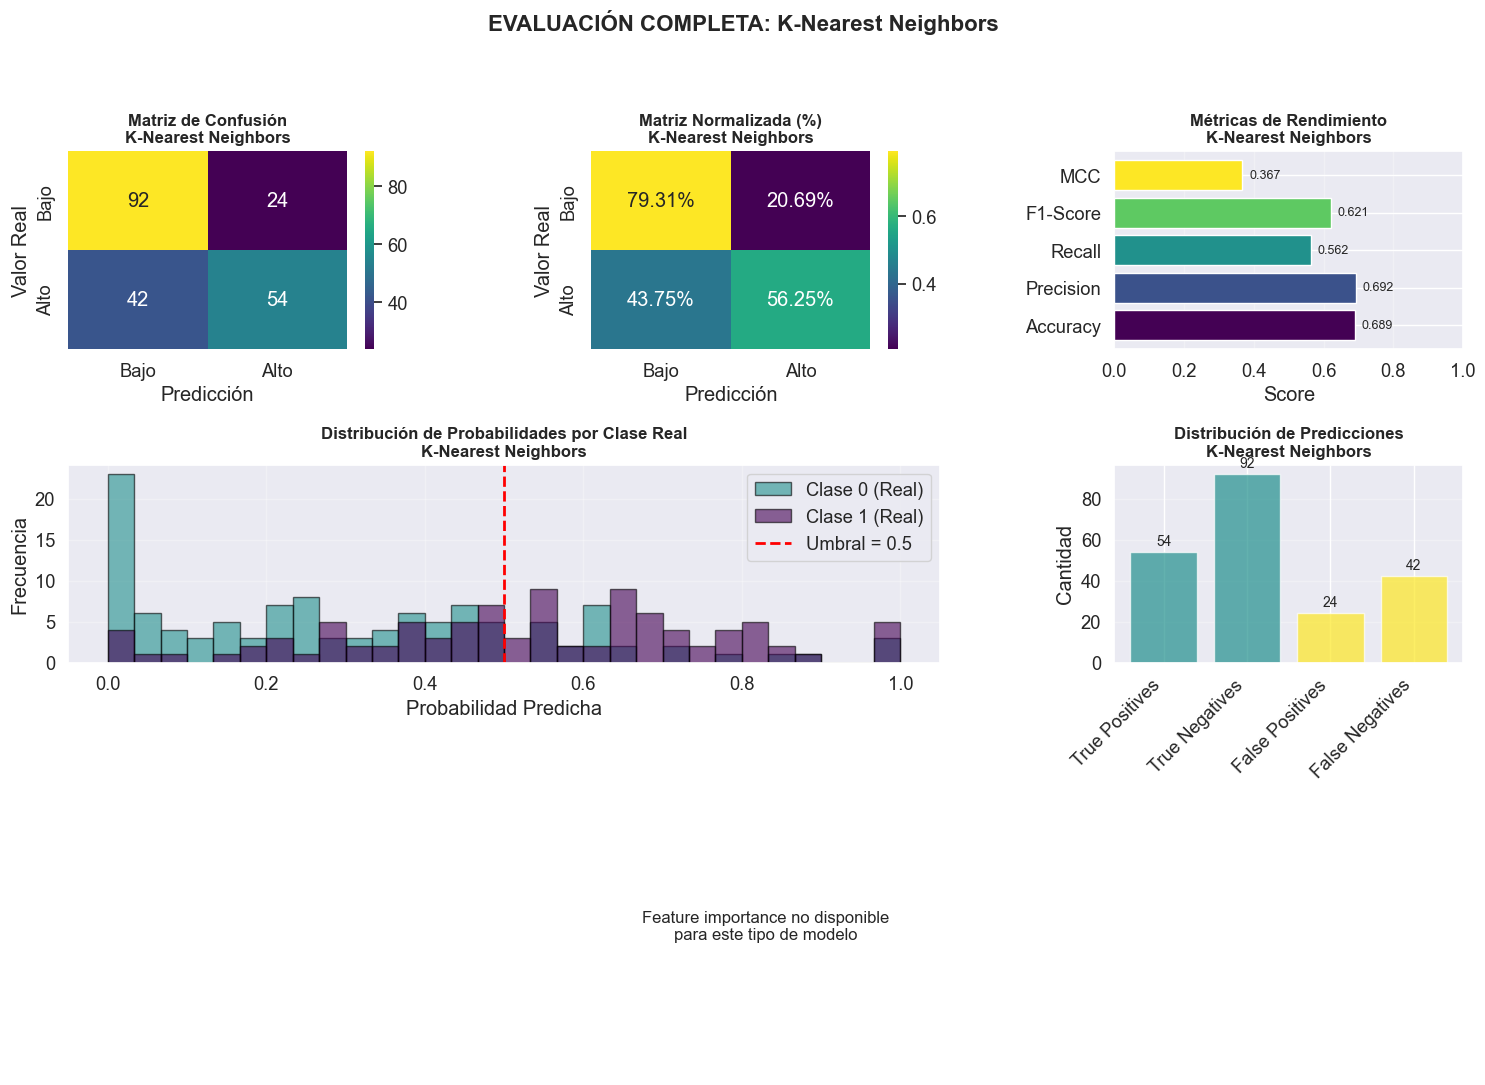

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=11, weights='distance', n_jobs=-1)
metrics_knn = evaluate_model(knn_model, 'K-Nearest Neighbors', 
                             X_train, X_test, y_train, y_test, 
                             needs_scaling=True)

## RNN

Genero este wrapper para poder usar la funcion que vengo usando, lo hace "compatible" con los modelos de sckit-learn

In [98]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class KerasClassifierWrapper:
    def __init__(self, input_dim=None, epochs=50, batch_size=32):
        self.input_dim = input_dim
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        self._estimator_type = "classifier"  # CRÍTICO: Le dice a sklearn que es un clasificador
        self.classes_ = None  # Se llenará durante fit
    
    def get_params(self, deep=True):
        """Necesario para compatibilidad con scikit-learn"""
        return {
            'input_dim': self.input_dim,
            'epochs': self.epochs,
            'batch_size': self.batch_size
        }
    
    def set_params(self, **params):
        """Necesario para compatibilidad con scikit-learn"""
        for key, value in params.items():
            setattr(self, key, value)
        return self
        
    def fit(self, X, y):
        # Guardar clases únicas
        self.classes_ = np.unique(y)
        
        # Construir modelo
        tf.random.set_seed(42)
        if self.input_dim is None:
            self.input_dim = X.shape[1]
            
        self.model = keras.Sequential([
            layers.Input(shape=(self.input_dim,)),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])
        
        self.model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        # Entrenar (silencioso)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, 
                      validation_split=0.2, verbose=0)
        return self
    
    def predict(self, X):
        if self.model is None:
            raise ValueError("Model must be fitted before prediction")
        proba = self.model.predict(X, verbose=0)
        return (proba > 0.5).astype(int).flatten()
    
    def predict_proba(self, X):
        if self.model is None:
            raise ValueError("Model must be fitted before prediction")
        proba = self.model.predict(X, verbose=0).flatten()
        # Retornar formato [prob_clase_0, prob_clase_1]
        return np.column_stack([1 - proba, proba])


ENTRENANDO: Neural Network

RESULTADOS: Neural Network
Accuracy:           0.6604
Precision:          0.6429
Recall:             0.5625
F1-Score:           0.6000
MCC:                0.3093
Tiempo entrenamiento: 3.7950s
Tiempo predicción:    0.0827s


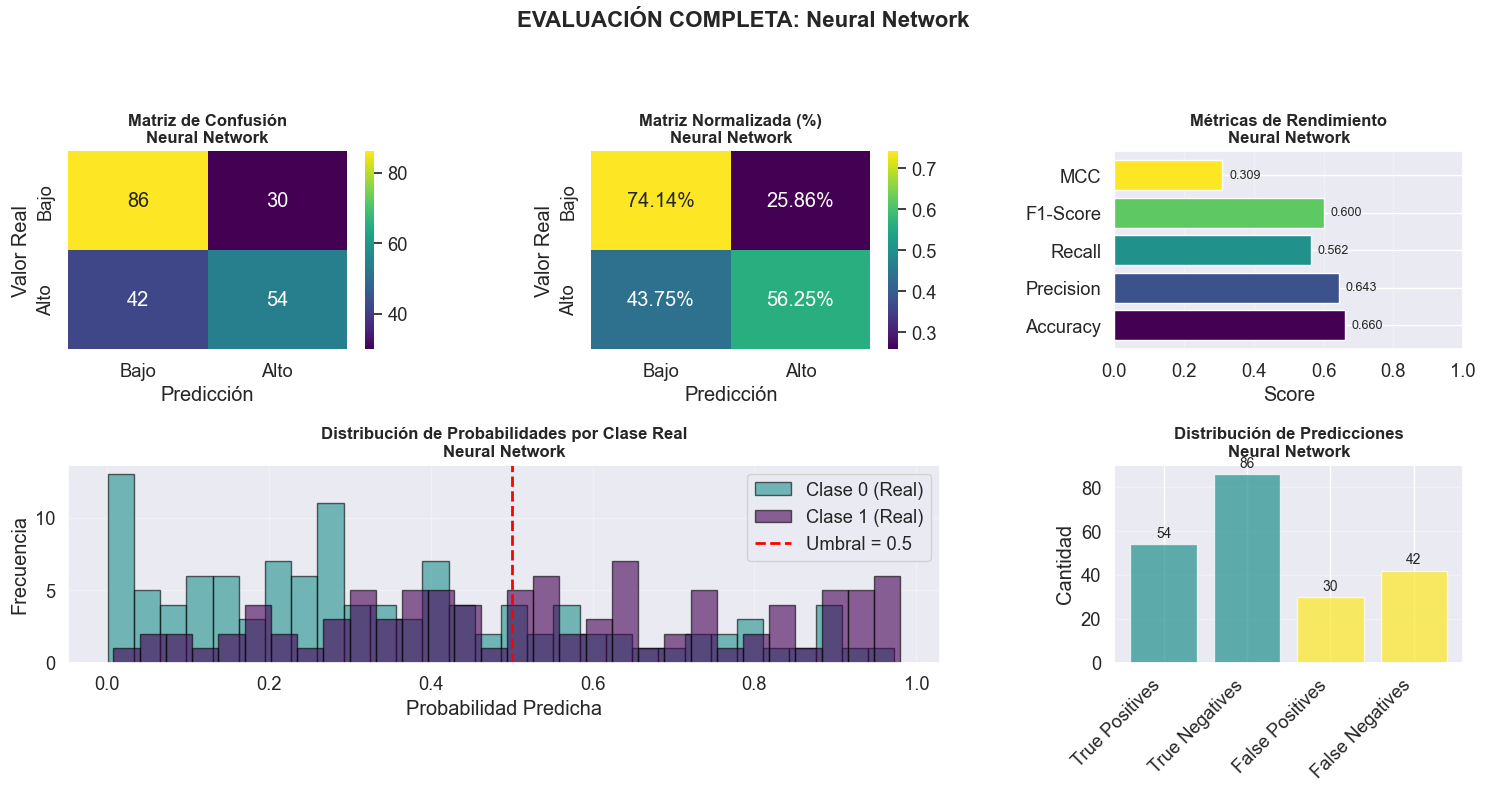

In [99]:
nn_model = KerasClassifierWrapper(input_dim=X_train.shape[1], epochs=50, batch_size=32)
metrics_nn = evaluate_model(nn_model, 'Neural Network', 
                            X_train, X_test, y_train, y_test, 
                            needs_scaling=True, 
                            show_feature_importance=False)


COMPARACIÓN FINAL DE MODELOS
              Model  Accuracy  Precision   Recall  F1-Score      MCC  CV_Accuracy_Mean  CV_Accuracy_Std  Train_Time  Pred_Time
Logistic Regression  0.650943   0.612245 0.625000  0.618557 0.296934          0.614512         0.028393    0.003743   0.000121
      Random Forest  0.716981   0.680000 0.708333  0.693878 0.431234          0.677427         0.028182    0.137322   0.027949
K-Nearest Neighbors  0.688679   0.692308 0.562500  0.620690 0.367055          0.689755         0.047528    0.000582   0.012435
     Neural Network  0.660377   0.642857 0.562500  0.600000 0.309258          0.622696         0.023877    3.794998   0.082677


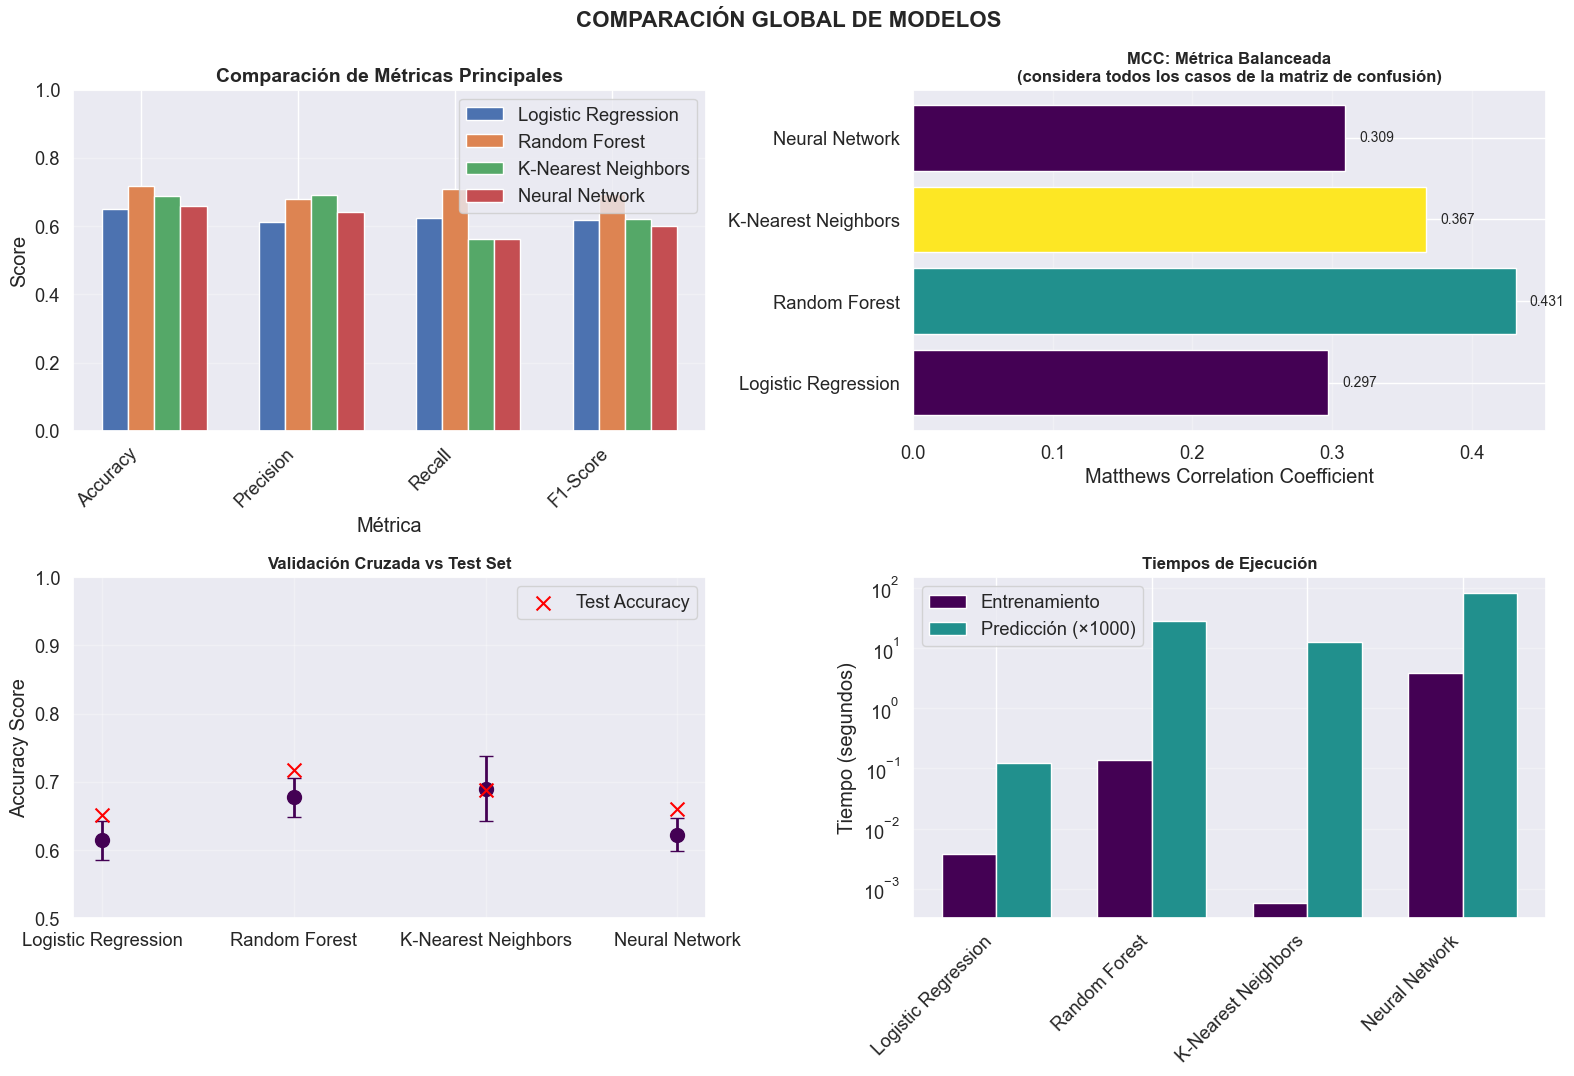

In [100]:
results_df = pd.DataFrame([metrics_lr, metrics_rf, metrics_knn, metrics_nn])

print("\n" + "="*80)
print("COMPARACIÓN FINAL DE MODELOS")
print("="*80)
print(results_df.to_string(index=False))

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.subplots_adjust(hspace=0.35, wspace=0.3)

# 1. Métricas principales
ax1 = axes[0, 0]
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_to_plot))*1.5
width = 0.25

for i, (_, row) in enumerate(results_df.iterrows()):
    values = [row[m] for m in metrics_to_plot]
    ax1.bar(x + i*width, values, width, label=row['Model'])

ax1.set_xlabel('Métrica')
ax1.set_ylabel('Score')
ax1.set_title('Comparación de Métricas Principales', fontsize=14, fontweight='bold')
ax1.set_xticks(x + width)
ax1.set_xticklabels(metrics_to_plot, rotation=45, ha='right')
ax1.legend()
ax1.grid(alpha=0.3, axis='y')
ax1.set_ylim([0, 1])

# 2. MCC (métrica balanceada)
ax2 = axes[0, 1]
colors = ['#440154', '#21908D', '#FDE724']
bars = ax2.barh(results_df['Model'], results_df['MCC'], color=colors)
ax2.set_xlabel('Matthews Correlation Coefficient')
ax2.set_title('MCC: Métrica Balanceada\n(considera todos los casos de la matriz de confusión)', 
              fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3, axis='x')
for bar, val in zip(bars, results_df['MCC']):
    ax2.text(val + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{val:.3f}', va='center', fontsize=10)

# 3. Validación Cruzada
ax3 = axes[1, 0]
ax3.errorbar(results_df['Model'], results_df['CV_Accuracy_Mean'], 
             yerr=results_df['CV_Accuracy_Std'], 
             fmt='o', markersize=10, capsize=5, linewidth=2, color='#440154')
ax3.scatter(results_df['Model'], results_df['Accuracy'], 
           marker='x', s=100, c='red', label='Test Accuracy', zorder=5)
ax3.set_ylabel('Accuracy Score')
ax3.set_title('Validación Cruzada vs Test Set', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)
ax3.set_ylim([0.5, 1])

# 4. Tiempos de ejecución
ax4 = axes[1, 1]
x_pos = np.arange(len(results_df))
width = 0.35
bars1 = ax4.bar(x_pos - width/2, results_df['Train_Time'], width, 
                label='Entrenamiento', color='#440154')
bars2 = ax4.bar(x_pos + width/2, results_df['Pred_Time']*1000, width, 
                label='Predicción (×1000)', color='#21908D')
ax4.set_ylabel('Tiempo (segundos)')
ax4.set_title('Tiempos de Ejecución', fontsize=12, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax4.legend()
ax4.grid(alpha=0.3, axis='y')
ax4.set_yscale('log')  # Escala logarítmica para ver mejor las diferencias

plt.suptitle('COMPARACIÓN GLOBAL DE MODELOS', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
